# <span style="color:darkmagenta">Análisis de secuenciación de ARN de una sola céula en cáncer de hígado (hepatoplastoma HB)</span>

## <span style="color:mediumvioletred">Método 1: Best practices for single-cell analysis across modalities</span>
El presente análisis de secuenciación de una sola célula, se basa en el manual de prácticas de single cell de Heumos, L., Schaar, A.C., Lance, C. et al.(2023) [https://doi.org/10.1038/s41576-023-00586-w]

Además, toma como base los estudios de Bruce Aronow et al., (January 25, 2023), *"Modeling Hepatoblastoma: Identification of Distinct Tumor Cell Populations and Key Genetic Mechanisms through Single Cell Sequencing (scRNA-seq)"* y de Sonya A MacParland et al. (June 19, 2024), *"Single cell RNA sequencing of human liver reveals distinct intrahepatic macrophage populations"*. 

------------

**Obtención de datos:**
Los datos se obtuvieron a través del portal *Human Cell Atlas* (HCA) [https://data.humancellatlas.org/] donde:

1. Primer estudio: Bruce Aronow et al. [https://explore.data.humancellatlas.org/projects/2084526b-a66f-4c40-bb89-6fd162f2eb38], se descargaron los archivos de matriz 10X con un subconjunto de muestra: 2 muestras de hígado sano (control) y 5 muestras de tumor de hepatoblastoma con el tipo de archivo *tar.gz* que contiene 14 archivos y pesa (2,63 GB).
2. Segundo estudio: Sonya A MacParland et al. [https://explore.data.humancellatlas.org/projects/4d6f6c96-2a83-43d8-8fe1-0f53bffd4674], se descargaron los archivos en formato *loom* que contiene 6 archivos y pesa (7,67 GB) donde se seleccionaron 5 muestras tumorales y 2 controles.

Después de la descarga de los archivos y antes de preprocesar los datos, se limpian los datos para trabajar solo con el número de genes (n_genes), identificadores de genes y el número de células (n_cells).

---------------
# <span style="color:darkmagenta">1. Preprocesamiento y visualización</span>

## <span style="color:mediumvioletred">1. Quality control</span>

### 1.1 Configuración y entorno de datos

In [26]:
#Para descargas
import gdown, os, gzip, shutil

# Gestión básica de datos y representación gráfica
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import os

# Scanpy fundamentals
import anndata as ad
import scanpy as sc
import seaborn as sb

# sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(figsize=(6, 6))
import scvi

/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-

### 1.2 Carga de muestras de hepatoblastoma (HB)
Estas muestras corresponden al primer estudio de Bruce Aronow et al. [https://explore.data.humancellatlas.org/projects/2084526b-a66f-4c40-bb89-6fd162f2eb38
 ], que contiene los archivos de matriz 10X; 2 muestras de hígado sano (control) y 5 muestras de tumor de hepatoblastoma con el tipo de archivo *tar.gz* que contiene 14 archivos (2,63 GB).

**Download via curl** --> Species: Homo sapiens

File Type:
| Name      | File Count | File Size |
|-----------|------------|-----------|
| tar.gz    | 14         | 2.63 GB   |

In [2]:
pwd

'/home/mcgonzalez/Servicio_Social/Notebooks'

In [3]:
%cd /home/mcgonzalez/Servicio_Social/Data/HB_filtered

/home/mcgonzalez/Servicio_Social/Data/HB_filtered


/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


-------
**Aquí comienzan las muestras de hígado sano (control)**

In [153]:
adata6 = sc.read_10x_mtx(
    "/home/mcgonzalez/Servicio_Social/Data/HB_filtered/HB17_background_filtered_feature_bc_matrix",
    var_names="gene_symbols",
    cache=False  # Fuerza la lectura directa sin caché
)

In [4]:
adata6 = sc.read_10x_mtx('HB17_background_filtered_feature_bc_matrix', var_names='gene_symbols')

In [154]:
adata6.var_names_make_unique()

In [155]:
sc.pp.filter_genes(adata6, min_cells =10)
sc.pp.filter_cells(adata6, min_genes =200)

In [156]:
adata6.var = adata6.var.drop(columns=['feature_types'])
adata6.var_names_make_unique()
adata6

AnnData object with n_obs × n_vars = 11197 × 16895
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [158]:
adata7 = sc.read_10x_mtx(
    "/home/mcgonzalez/Servicio_Social/Data/HB_filtered/HB53_background_filtered_feature_bc_matrix",
    var_names="gene_symbols",
    cache=False  # Fuerza la lectura directa sin caché
)

In [8]:
adata7 = sc.read_10x_mtx('HB53_background_filtered_feature_bc_matrix', var_names='gene_symbols')

In [159]:
adata7.var_names_make_unique()

In [160]:
sc.pp.filter_genes(adata7, min_cells =10)
sc.pp.filter_cells(adata7, min_genes =200)

In [161]:
adata7.var = adata7.var.drop(columns=['feature_types'])
adata7.var_names_make_unique()
adata7

AnnData object with n_obs × n_vars = 8540 × 22277
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

-------------
**Aquí comienzan las muestras de tumor de Hepatoblastoma (HB)**

In [162]:
adata8 = sc.read_10x_mtx(
    "/home/mcgonzalez/Servicio_Social/Data/HB_filtered/HB17_tumor_filtered_feature_bc_matrix",
    var_names="gene_symbols",
    cache=False  # Fuerza la lectura directa sin caché
)

In [12]:
adata8 = sc.read_10x_mtx('HB17_tumor_filtered_feature_bc_matrix', var_names='gene_symbols')

In [163]:
adata8.var_names_make_unique()

In [164]:
sc.pp.filter_genes(adata8, min_cells =10)
sc.pp.filter_cells(adata8, min_genes =200)

In [165]:
adata8.var = adata8.var.drop(columns=['feature_types'])
adata8.var_names_make_unique()
adata8

AnnData object with n_obs × n_vars = 7995 × 22112
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [166]:
adata9 = sc.read_10x_mtx(
    "/home/mcgonzalez/Servicio_Social/Data/HB_filtered/HB17_PDX_filtered_feature_bc_matrix",
    var_names="gene_symbols",
    cache=False  # Fuerza la lectura directa sin caché
)

In [16]:
adata9 = sc.read_10x_mtx('HB17_PDX_filtered_feature_bc_matrix', var_names='gene_symbols')

In [167]:
adata9.var_names_make_unique()

In [168]:
sc.pp.filter_genes(adata9, min_cells =10)
sc.pp.filter_cells(adata9, min_genes =200)

In [169]:
adata9.var = adata9.var.drop(columns=['feature_types'])
adata9.var_names_make_unique()
adata9

AnnData object with n_obs × n_vars = 8027 × 22405
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [170]:
adata10 = sc.read_10x_mtx(
    "/home/mcgonzalez/Servicio_Social/Data/HB_filtered/HB30_tumor_filtered_feature_bc_matrix",
    var_names="gene_symbols",
    cache=False  # Fuerza la lectura directa sin caché
)

In [20]:
adata10 = sc.read_10x_mtx('HB30_tumor_filtered_feature_bc_matrix', var_names='gene_symbols')

In [171]:
adata10.var_names_make_unique()

In [172]:
sc.pp.filter_genes(adata10, min_cells =10)
sc.pp.filter_cells(adata10, min_genes =200)

In [173]:
adata10.var = adata10.var.drop(columns=['feature_types'])
adata10.var_names_make_unique()
adata10

AnnData object with n_obs × n_vars = 19042 × 24433
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [174]:
adata11 = sc.read_10x_mtx(
    "/home/mcgonzalez/Servicio_Social/Data/HB_filtered/HB30_PDX_filtered_feature_bc_matrix",
    var_names="gene_symbols",
    cache=False  # Fuerza la lectura directa sin caché
)

In [24]:
adata11 = sc.read_10x_mtx('HB30_PDX_filtered_feature_bc_matrix', var_names='gene_symbols')

In [175]:
adata11.var_names_make_unique()

In [176]:
sc.pp.filter_genes(adata11, min_cells =10)
sc.pp.filter_cells(adata11, min_genes =200)

In [177]:
adata11.var = adata11.var.drop(columns=['feature_types'])
adata11.var_names_make_unique()
adata11

AnnData object with n_obs × n_vars = 10303 × 23198
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [178]:
adata12 = sc.read_10x_mtx(
    "/home/mcgonzalez/Servicio_Social/Data/HB_filtered/HB53_tumor_filtered_feature_bc_matrix",
    var_names="gene_symbols",
    cache=False  # Fuerza la lectura directa sin caché
)

In [28]:
adata12 = sc.read_10x_mtx('HB53_tumor_filtered_feature_bc_matrix', var_names='gene_symbols')

In [179]:
adata12.var_names_make_unique()

In [180]:
sc.pp.filter_genes(adata12, min_cells =10)
sc.pp.filter_cells(adata12, min_genes =200)

In [181]:
adata12.var = adata12.var.drop(columns=['feature_types'])
adata12.var_names_make_unique()
adata12

AnnData object with n_obs × n_vars = 12832 × 24324
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

-------
### 1.2 Creación de archivos h5ad

In [182]:
pwd

'/home/mcgonzalez/Servicio_Social/Notebooks'

In [183]:
%cd /home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad

/home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad


In [184]:
adata6.write_h5ad('control6')

... storing 'feature_types' as categorical


In [185]:
adata7.write_h5ad('control7')

In [186]:
adata8.write_h5ad('tumor_s1')

In [187]:
adata9.write_h5ad('tumor_s2')

In [188]:
adata10.write_h5ad('tumor_s3')

In [189]:
adata11.write_h5ad('tumor_s4')

In [190]:
adata12.write_h5ad('tumor_s5')

---------
### Configuración del entrono y datos

Cargamos el conjunto de datos con scanpy:

In [1]:
import numpy as np
import scanpy as sc
import seaborn as sns
from scipy.stats import median_abs_deviation

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

Utilizando un conjunto de datos de las muestras de hepatoblastoma (tumor_s4):

In [2]:
adata = sc.read_10x_mtx( # Lee los datos de la matriz en formato 10X
    "/home/mcgonzalez/Servicio_Social/Data/HB_filtered/HB30_PDX_filtered_feature_bc_matrix",  # Ruta al directorio que contiene matrix.mtx.gz, features.tsv.gz y barcodes.tsv.gz 
    var_names='gene_symbols',  # Configura los nombres de las variables como los símbolos de los genes
    cache=True # Guarda los datos en caché para acelerar futuras cargas
)

# Muestra un resumen de los datos cargados
adata

AnnData object with n_obs × n_vars = 10303 × 33538
    var: 'gene_ids', 'feature_types'

Ejecuntamos la función `var_names_make_unique()` para que el nombre de la variable sea único cuando agregamos una cadena númerica a cada elemento que tenga un índice duplicado.

Este conjunto de datos tiene la forma: `n_obs`10303 x `n_vars` 33538

In [3]:
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 10303 × 33538
    var: 'gene_ids', 'feature_types'

------
### Filtrado de células de baja calidad

Definimos el umbral de control de calidad (QC) considerando las siguientes tres covariables:

- El número de recuentos por código de barras (profundidad de recuento)
- El número de genes por código de barras
- La fracción de recuentos de genes mitocondriales por código de barras

Dado a que podemos tener en la muestra células con membranas rotas en cuyo caso el ARNm citoplasmático se ha filtrado, realizamos el filtrado para que solo el ARNm en las mitocondrias esté presente

---------
1. Cálculo de las covariables o métricas de control de calidad (QC)

Usando la función `sc.pp.calculate_qc_metrics` calculamos las porciones de los recuentos para aquellas poblaciones de genes específicos; es decir, definimos los genes mitocondriales, ribosomales y de hemoglobina.

-----------

In [4]:
# genes mitocondriales
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# genes ribosomales
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# genes de hemoglobina
adata.var["hb"] = adata.var_names.str.contains(("^HB[^(P)]"))

In [5]:
# cálculo de las métricas de control de claidad (QC) con scanpy:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata

AnnData object with n_obs × n_vars = 10303 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

Sobre las métricas en la documentación de scanpy:
- `n_genes_by_counts` en la columna `.obs` corresponde al número de genes con recuentos positivos en una célula.
- `total_counts` corresponde al número total de recuentos de una celda (tamaño de la biblioteca).
- `pct_counts_mt` corresponde a la proporción del recuento total de una célula (mitocondriales).

-----------
2. Gráfica de las tres covariables del control de calidad (QC) y `n_genes_by_counts` por muestra.

Esto con la finalidad de evaluar la calidad con la que se capturaron las respectivas células `total_counts`, `pct_counts_mt`

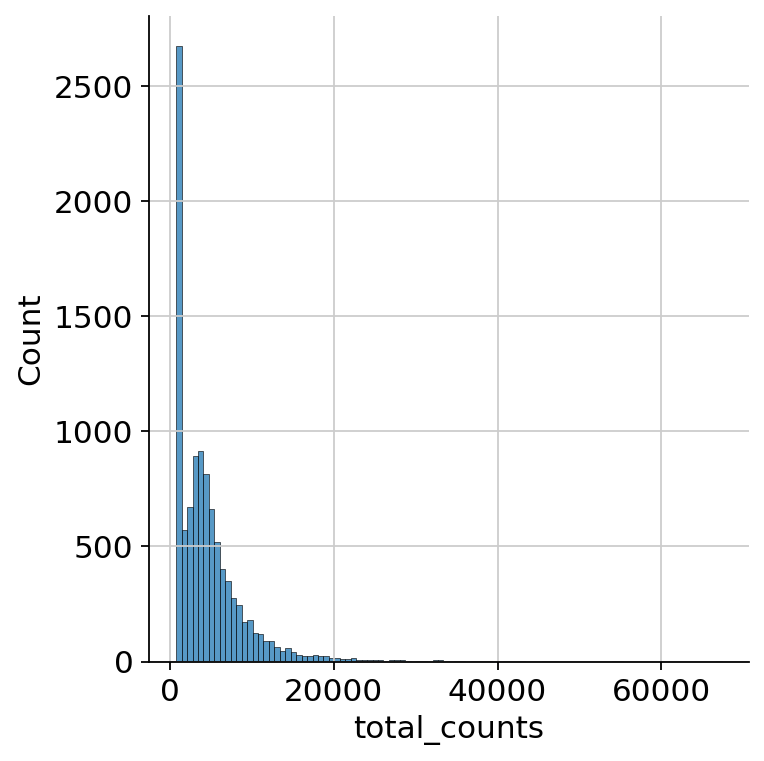

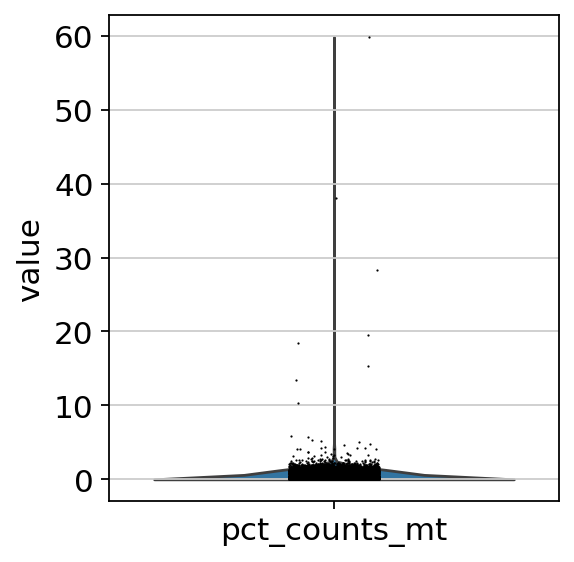

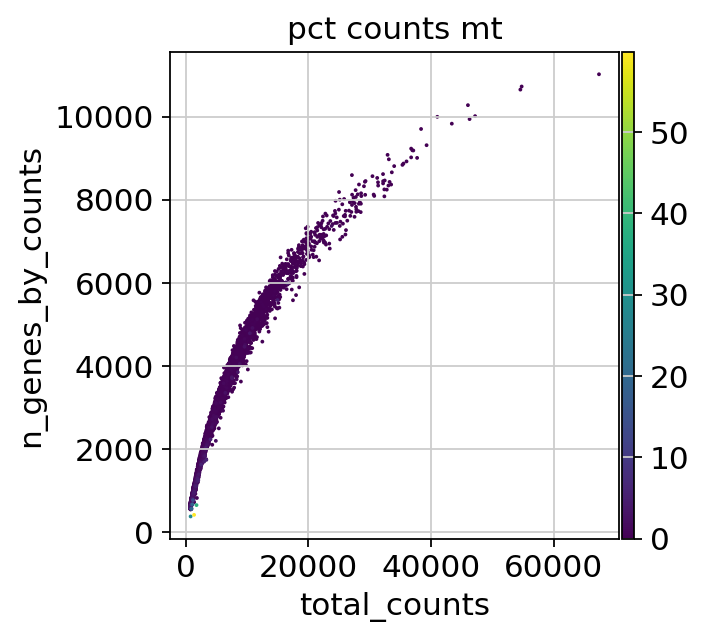

In [6]:
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "pct_counts_mt")
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

Estos gráficos nos muestran que varias células tienen un porcentaje relativamente alto de recuentos mitocondriales (comunmente asociados a la degradación celular). No obstante, dado a que el número de recuentos por célula es suficientemente alto así como el porcentaje de lectruras mitocondriales que es inferior al 10% para la mayoría de las células.

---------

3. Definición de umbrales manuales para filtrar células MAD (derivaciones absolutas medianas).

$$ MAD = \text{mediana} \left(|X_{i}-\text{mediana}(X)|\right) $$

donde $X_{i}$ es la métrica de control de calidad respectiva de una observación y describe estadísticamente la variablilidad de la métrica.

a) definimos la función `metric` (una columna en `.obs` y el número de MAD `nmad`

In [7]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

Aplicamos la función a las colvariables: `log1p_total_counts`, `log1p_n_genes_by_counts` y `pct_counts_in_top_20_genes` estableciendo un umbral de 5 MAD.

Aquí `pct_counts_Mt` se filtra con 3 MAD. Además, se eliminan aquellas células con un porcentaje de recuento mitocondrial mayor al 8%

In [8]:
adata.obs["outlier"] = (
    is_outlier(adata, "log1p_total_counts", 5)
    | is_outlier(adata, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata, "pct_counts_in_top_20_genes", 5)
)
adata.obs.outlier.value_counts()

outlier
False    10280
True        23
Name: count, dtype: int64

Filtrando con 3 MAD, se eliminan las células con un porcentaje de recuento mitocondrial superior al 8%

In [9]:
adata.obs["mt_outlier"] = is_outlier(adata, "pct_counts_mt", 3) | (
    adata.obs["pct_counts_mt"] > 8
)
adata.obs.mt_outlier.value_counts()

mt_outlier
False    7736
True     2567
Name: count, dtype: int64

In [10]:
# Definimos el objeto AnnData en función de las columnas:

print(f"Total number of cells: {adata.n_obs}")
adata = adata[(~adata.obs.outlier) & (~adata.obs.mt_outlier)].copy()

print(f"Number of cells after filtering of low quality cells: {adata.n_obs}")

Total number of cells: 10303
Number of cells after filtering of low quality cells: 7733


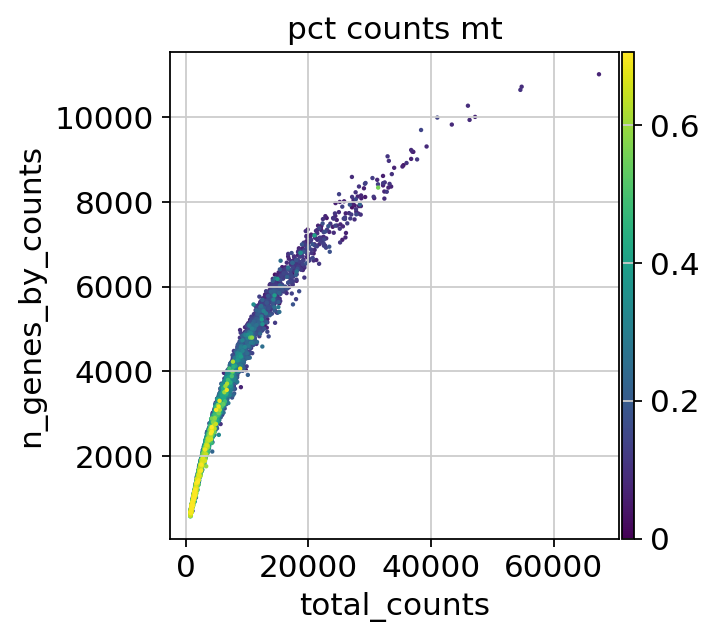

In [11]:
p1 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

--------
### Corrección del ARN ambiental

La secuenciación de ARNm (ARN ambiental) basada en gotas, implica recuentos de identificadores moleculares únicos (UMI) para genes en múltiples células. Su principal objetivo es identificar la cantidad de moléculas para cada gen y cada célula en donde cada gota contiene ARNm de células individuales. Dicha contaminación de ARNm libre de células en la solución se le conoce como "la sopa" debido a la lisis celular. 

Soup X se encarga de calcular el perfil de la sopa estimando el perfil de expresión del ARNm mediante gotitas vacías, es decir, estima la fracción de contaminación específica de la célula y corrige la matriz de expresión de acuerdo con la expresión del ARNm y la contaminación estimada.

-----------
Nota: esta es una modificación del manual de single cell best practices debido a que rpy2 solo tiene hasta la versión 4.3 de R y no es compatible con la versión más reciente de R (4.4.1) del servidor.

1. Cargamos los paquetes de Python para ejecutar Soup X.

In [12]:
import anndata2ri
import logging

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_1980532/3659631106.py:9: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [13]:
%%R
library(SoupX)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


--------
2. Creamos una copia del objeto AnnData, lo normalizamos, reducimos la dimensionalidad y calculamos los clústers de Leiden que tenemos en la copia ya procesada.

En este caso, cremos una copia del objeto AnnData, lo normalizamos y lo transformamos en log1p usanod el método de logaritmo desplazado.

In [14]:
adata_pp = adata.copy()
sc.pp.normalize_per_cell(adata_pp)
sc.pp.log1p(adata_pp)

-------------
3. Calculamos los componentes principales de los datos de modo que obtenemos una representación de menor dimensión en la matriz para generar un gráfico de vecinadad de datos y así, poder ejecutar la agrupación de Leiden (gráfico KNN).

In [15]:
sc.pp.pca(adata_pp)
sc.pp.neighbors(adata_pp)
sc.tl.leiden(adata_pp, key_added="soupx_groups")

# Preprocess variables for SoupX
soupx_groups = adata_pp.obs["soupx_groups"]

/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_1980532/1913318786.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_pp, key_added="soupx_groups")


-----------
4. Eliminamos la copia de nuestro objeto AnnData dado a que generamos un vector de clústeres que usremos en SoupX

In [16]:
del adata_pp

-------------
5. Guardamos los nombres de las células, los genes y la matriz de los datos de salida filtrada de CellRanger. Trasponemos `.X`

In [17]:
cells = adata.obs_names
genes = adata.var_names
data = adata.X.T

In [18]:
adata_raw = sc.read_10x_mtx(
    "/home/mcgonzalez/Servicio_Social/Data/HB_filtered/HB30_PDX_filtered_feature_bc_matrix",
    var_names='gene_symbols',
    cache=True
)
adata_raw.var_names_make_unique()
data_tod = adata_raw.X.T #aquí transponemos el archivo .X

-----
En este caso, las entradas son: la matriz de CellRanger filtrada de los códigos de barras, la tabla sin procesar de gotas de CellRanger, los nombres de los genes y las células así como los grupos obtenidos a partir de la agrupación de Leiden simple.

In [19]:
del adata_raw

In [20]:
%%R -i data -i data_tod -i genes -i cells -i soupx_groups -o out 

# specify row and column names of data
rownames(data) = genes
colnames(data) = cells
# ensure correct sparse format for table of counts and table of droplets
data <- as(data, "sparseMatrix")
data_tod <- as(data_tod, "sparseMatrix")

# Generate SoupChannel Object for SoupX 
sc = SoupChannel(data_tod, data, calcSoupProfile = FALSE)

# Add extra meta data to the SoupChannel object
soupProf = data.frame(row.names = rownames(data), est = rowSums(data)/sum(data), counts = rowSums(data))
sc = setSoupProfile(sc, soupProf)
# Set cluster information in SoupChannel
sc = setClusters(sc, soupx_groups)

# Estimate contamination fraction
sc  = autoEstCont(sc, doPlot=FALSE)
# Infer corrected table of counts and rount to integer
out = adjustCounts(sc, roundToInt = TRUE)

110 genes passed tf-idf cut-off and 12 soup quantile filter.  Taking the top 12.
Using 29 independent estimates of rho.
Estimated global rho of 0.13
Expanding counts from 13 clusters to 7733 cells.
In addition: Warning messages:
1: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
2: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
3: In sparseMatrix(i = out@i[w] + 1, j = out@j[w] + 1, x = out@x[w],  :
  'giveCsparse' is deprecated; setting repr="T" for you


In [21]:
adata.layers["counts"] = adata.X
adata.layers["soupX_counts"] = out.T
adata.X = adata.layers["soupX_counts"]

Filtramos aquellos genes que no se detecten en al menos 20 células porque no son informativos.

In [22]:
print(f"Total number of genes: {adata.n_vars}")

# Min 20 cells - filters out 0 count genes
sc.pp.filter_genes(adata, min_cells=20)
print(f"Number of genes after cell filter: {adata.n_vars}")

Total number of genes: 33538
Number of genes after cell filter: 20824


------------
### Detección de dobletes

La detección de dobletes se realizó con el modelo **SCVI** y **SOLO**

Se define como dos células que están secuenciadas bajo el mismo código de barras celular.

- **Doblete homotípico**: está formado por el mismo tipo de célula (pero de distintos individuos).
- **Doblete heterotípico**: está formado por diferentes tipos de célula

Los dobletes los podemos identificar a apartir de su número de lecturas y de características detectadas. Para ello, useremos el paquete scDbFinder de R, el cual selecciona de manera aleatoria dos gotitas y forma dobletes artificiales de las mismas promediando sus perfiles de expresión genética.

In [23]:
adata

AnnData object with n_obs × n_vars = 7733 × 20824
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    layers: 'counts', 'soupX_counts'

In [24]:
sc.pp.filter_genes(adata, min_cells = 10)

In [27]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/mcgonzalez/miniconda3/envs/Servicio/lib/python ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/mcgonzalez/miniconda3/envs/Servicio/lib/python ...
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have man

Epoch 400/400: 100%|█| 400/400 [33:37<00:00,  5.08s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [33:37<00:00,  5.04s/it, v_num=1, train_loss_step


In [28]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/mcgonzalez/miniconda3/envs/Servicio/lib/python ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/mcgonzalez/miniconda3/envs/Servicio/lib/python ...
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have man

Epoch 242/400:  60%|▌| 242/400 [03:07<02:02,  1.29it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.217. Signaling Trainer to stop.


In [29]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

#df.index = df.index.map(lambda x: x[:-2])

df

/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


doublet   singlet prediction
AAACCCAAGACATCAA-1  0.862612  0.137388    doublet
AAACCCAAGACCATAA-1  0.029573  0.970427    singlet
AAACCCAAGACCCTTA-1  0.433457  0.566543    singlet
AAACCCAAGTGCTCAT-1  0.009164  0.990836    singlet
AAACCCAGTAGAGATT-1  0.307360  0.692640    singlet
...                      ...       ...        ...
TTTGGTTTCTAGCAAC-1  0.019175  0.980825    singlet
TTTGTTGCAGCAGAAC-1  0.003914  0.996086    singlet
TTTGTTGCATAAGCGG-1  0.006077  0.993923    singlet
TTTGTTGGTTCAGCGC-1  0.082145  0.917855    singlet
TTTGTTGTCTCGTTTA-1  0.001623  0.998377    singlet

[7733 rows x 3 columns]

In [30]:
df.groupby('prediction').count()

doublet  singlet
prediction                  
doublet        1119     1119
singlet        6614     6614

In [31]:
df['dif'] = df.doublet - df.singlet
df

doublet   singlet prediction       dif
AAACCCAAGACATCAA-1  0.862612  0.137388    doublet  0.725224
AAACCCAAGACCATAA-1  0.029573  0.970427    singlet -0.940855
AAACCCAAGACCCTTA-1  0.433457  0.566543    singlet -0.133087
AAACCCAAGTGCTCAT-1  0.009164  0.990836    singlet -0.981673
AAACCCAGTAGAGATT-1  0.307360  0.692640    singlet -0.385280
...                      ...       ...        ...       ...
TTTGGTTTCTAGCAAC-1  0.019175  0.980825    singlet -0.961649
TTTGTTGCAGCAGAAC-1  0.003914  0.996086    singlet -0.992171
TTTGTTGCATAAGCGG-1  0.006077  0.993923    singlet -0.987846
TTTGTTGGTTCAGCGC-1  0.082145  0.917855    singlet -0.835710
TTTGTTGTCTCGTTTA-1  0.001623  0.998377    singlet -0.996755

[7733 rows x 4 columns]

In [32]:
import seaborn as sns

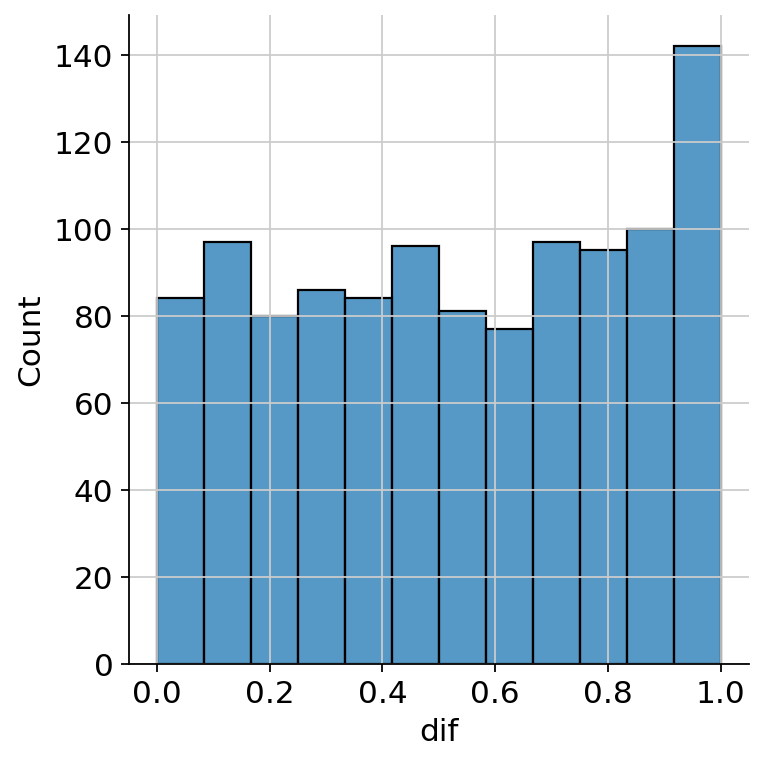

In [33]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [35]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 0.9)] # cambio para filtrar las células >0.8
doublets

doublet   singlet prediction       dif
AAACGAAAGCCAGTAG-1  0.959874  0.040126    doublet  0.919748
AAAGGATGTGTACATC-1  0.957312  0.042688    doublet  0.914624
AACAACCCATGGAATA-1  0.997106  0.002894    doublet  0.994212
AACAACCGTTAAGGGC-1  0.995087  0.004913    doublet  0.990174
AACAACCTCCACTGAA-1  0.972628  0.027372    doublet  0.945257
...                      ...       ...        ...       ...
TTCACCGGTCGGCTAC-1  0.987521  0.012479    doublet  0.975043
TTCCGGTCATCAGCGC-1  0.988948  0.011051    doublet  0.977897
TTGACCCGTTGGGATG-1  0.967194  0.032806    doublet  0.934388
TTTAGTCGTATGGTTC-1  0.964900  0.035100    doublet  0.929800
TTTGATCCAGTTGTTG-1  0.952498  0.047502    doublet  0.904995

[168 rows x 4 columns]

In [36]:
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)

In [37]:
adata.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCCAAGACATCAA-1               5093                 8.535819       11555.0   
AAACCCAAGACCATAA-1               2698                 7.900637        4333.0   
AAACCCAAGACCCTTA-1               1823                 7.508787        3073.0   
AAACCCAAGTGCTCAT-1               2253                 7.720462        3308.0   
AAACCCAGTAGAGATT-1               4880                 8.493105        9350.0   
...                               ...                      ...           ...   
TTTGGTTTCTAGCAAC-1               3075                 8.031385        5033.0   
TTTGTTGCAGCAGAAC-1               2738                 7.915348        4735.0   
TTTGTTGCATAAGCGG-1               2598                 7.862882        4053.0   
TTTGTTGGTTCAGCGC-1               2383                 7.776535        4046.0   
TTTGTTGTCTCGTTTA-1               5062                 8.529714       10911.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCCAAGACATCAA-1            9.354960                    6.049329   
AAACCCAAGACCATAA-1            8.374247                    8.492961   
AAACCCAAGACCCTTA-1            8.030735                    9.925155   
AAACCCAAGTGCTCAT-1            8.104402                    6.620314   
AAACCCAGTAGAGATT-1            9.143239                    4.834225   
...                                ...                         ...   
TTTGGTTTCTAGCAAC-1            8.523971                    5.424200   
TTTGTTGCAGCAGAAC-1            8.462948                   11.784583   
TTTGTTGCATAAGCGG-1            8.307459                   10.954848   
TTTGTTGGTTCAGCGC-1            8.305731                   11.023233   
TTTGTTGTCTCGTTTA-1            9.297619                    7.616167   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCCAAGACATCAA-1             30.0               3.433987       0.259628   
AAACCCAAGACCATAA-1              9.0               2.302585       0.207708   
AAACCCAAGACCCTTA-1             11.0               2.484907       0.357956   
AAACCCAAGTGCTCAT-1              6.0               1.945910       0.181378   
AAACCCAGTAGAGATT-1              6.0               1.945910       0.064171   
...                             ...                    ...            ...   
TTTGGTTTCTAGCAAC-1             11.0               2.484907       0.218558   
TTTGTTGCAGCAGAAC-1             15.0               2.772589       0.316790   
TTTGTTGCATAAGCGG-1              6.0               1.945910       0.148038   
TTTGTTGGTTCAGCGC-1             21.0               3.091043       0.519031   
TTTGTTGTCTCGTTTA-1             11.0               2.484907       0.100816   

                    total_counts_ribo  log1p_total_counts_ribo  \
AAACCCAAGACATCAA-1              203.0                 5.318120   
AAACCCAAGACCATAA-1              102.0                 4.634729   
AAACCCAAGACCCTTA-1              144.0                 4.976734   
AAACCCAAGTGCTCAT-1               83.0                 4.430817   
AAACCCAGTAGAGATT-1              127.0                 4.852030   
...                               ...                      ...   
TTTGGTTTCTAGCAAC-1               90.0                 4.510859   
TTTGTTGCAGCAGAAC-1               88.0                 4.488636   
TTTGTTGCATAAGCGG-1               81.0                 4.406719   
TTTGTTGGTTCAGCGC-1               91.0                 4.521789   
TTTGTTGTCTCGTTTA-1              114.0                 4.744932   

                    pct_counts_ribo  total_counts_hb  log1p_total_counts_hb  \
AAACCCAAGACATCAA-1         1.756815              4.0               1.609438   
AAACCCAAGACCATAA-1         2.354027              1.0               0.693147   
AAACCCAAGACCCTTA-1         4.685975              1.0               0.693147   
AAACCCAAGTGCTCAT-1         2.509069              0.0               0.000000   
AAACCCAGTAGAGATT-1         1.358289              1.0               0.693147   
...                       

In [38]:
columns_to_drop = ['_scvi_batch', '_scvi_labels']

# Eliminar las columnas
adata.obs.drop(columns_to_drop, axis=1, inplace=True)

In [39]:
adata = adata[~adata.obs.doublet]

In [40]:
adata.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
AAACCCAAGACATCAA-1               5093                 8.535819       11555.0   
AAACCCAAGACCATAA-1               2698                 7.900637        4333.0   
AAACCCAAGACCCTTA-1               1823                 7.508787        3073.0   
AAACCCAAGTGCTCAT-1               2253                 7.720462        3308.0   
AAACCCAGTAGAGATT-1               4880                 8.493105        9350.0   
...                               ...                      ...           ...   
TTTGGTTTCTAGCAAC-1               3075                 8.031385        5033.0   
TTTGTTGCAGCAGAAC-1               2738                 7.915348        4735.0   
TTTGTTGCATAAGCGG-1               2598                 7.862882        4053.0   
TTTGTTGGTTCAGCGC-1               2383                 7.776535        4046.0   
TTTGTTGTCTCGTTTA-1               5062                 8.529714       10911.0   

                    log1p_total_counts  pct_counts_in_top_20_genes  \
AAACCCAAGACATCAA-1            9.354960                    6.049329   
AAACCCAAGACCATAA-1            8.374247                    8.492961   
AAACCCAAGACCCTTA-1            8.030735                    9.925155   
AAACCCAAGTGCTCAT-1            8.104402                    6.620314   
AAACCCAGTAGAGATT-1            9.143239                    4.834225   
...                                ...                         ...   
TTTGGTTTCTAGCAAC-1            8.523971                    5.424200   
TTTGTTGCAGCAGAAC-1            8.462948                   11.784583   
TTTGTTGCATAAGCGG-1            8.307459                   10.954848   
TTTGTTGGTTCAGCGC-1            8.305731                   11.023233   
TTTGTTGTCTCGTTTA-1            9.297619                    7.616167   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACCCAAGACATCAA-1             30.0               3.433987       0.259628   
AAACCCAAGACCATAA-1              9.0               2.302585       0.207708   
AAACCCAAGACCCTTA-1             11.0               2.484907       0.357956   
AAACCCAAGTGCTCAT-1              6.0               1.945910       0.181378   
AAACCCAGTAGAGATT-1              6.0               1.945910       0.064171   
...                             ...                    ...            ...   
TTTGGTTTCTAGCAAC-1             11.0               2.484907       0.218558   
TTTGTTGCAGCAGAAC-1             15.0               2.772589       0.316790   
TTTGTTGCATAAGCGG-1              6.0               1.945910       0.148038   
TTTGTTGGTTCAGCGC-1             21.0               3.091043       0.519031   
TTTGTTGTCTCGTTTA-1             11.0               2.484907       0.100816   

                    total_counts_ribo  log1p_total_counts_ribo  \
AAACCCAAGACATCAA-1              203.0                 5.318120   
AAACCCAAGACCATAA-1              102.0                 4.634729   
AAACCCAAGACCCTTA-1              144.0                 4.976734   
AAACCCAAGTGCTCAT-1               83.0                 4.430817   
AAACCCAGTAGAGATT-1              127.0                 4.852030   
...                               ...                      ...   
TTTGGTTTCTAGCAAC-1               90.0                 4.510859   
TTTGTTGCAGCAGAAC-1               88.0                 4.488636   
TTTGTTGCATAAGCGG-1               81.0                 4.406719   
TTTGTTGGTTCAGCGC-1               91.0                 4.521789   
TTTGTTGTCTCGTTTA-1              114.0                 4.744932   

                    pct_counts_ribo  total_counts_hb  log1p_total_counts_hb  \
AAACCCAAGACATCAA-1         1.756815              4.0               1.609438   
AAACCCAAGACCATAA-1         2.354027              1.0               0.693147   
AAACCCAAGACCCTTA-1         4.685975              1.0               0.693147   
AAACCCAAGTGCTCAT-1         2.509069              0.0               0.000000   
AAACCCAGTAGAGATT-1         1.358289              1.0               0.693147   
...                       

Ahora guardamos el conjunto de datos de control de calidad como:

In [41]:
adata.write("/home/mcgonzalez/Servicio_Social/Data/adata_scBestPractices/s4_quality_control.h5ad")

------
## <span style="color:mediumvioletred">2. Normalización</span>

La normalización nos permite ajustar la variabilidad de los datos que surge de las diferencias en la profundidad de secuenciación, el tamaño de las células así como otros factores técnicos. 

-> Aquí se garantiza que las diferencias observadas entre las células se deban a la variación biológica y no a problemas técnicos.

La normalización de recuento total implica escalar los recuentos brutos de cada célula por los recuentos totales de esa célula, seguido de una transformación logarítmica para estabilizar los datos. El logaritmo desplazado resulta beneficioso para estabilizar la varianza para la posterior reducción de la dimensionalidad y la identificación de genes expresados de forma diferencial.

In [42]:
import scanpy as sc
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import anndata2ri
import logging
from scipy.sparse import issparse

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    # color_map="YlGnBu",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


/tmp/ipykernel_1980532/1527554728.py:22: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [43]:
adata = sc.read_h5ad('/home/mcgonzalez/Servicio_Social/Data/adata_scBestPractices/s4_quality_control.h5ad')

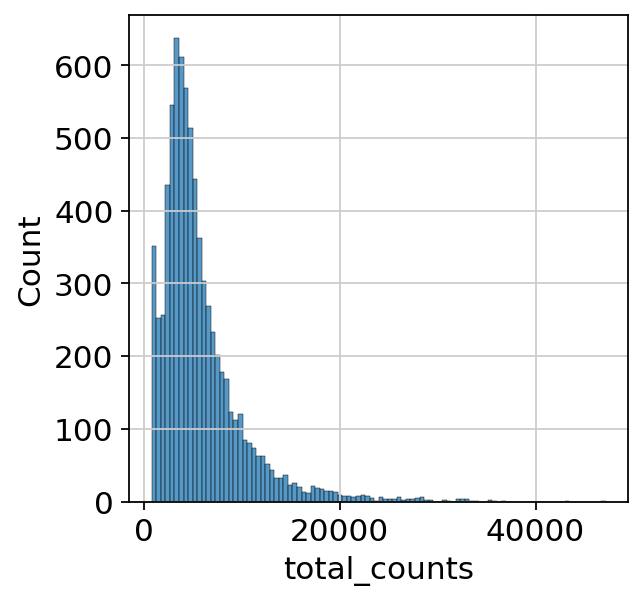

In [44]:
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False)

-------
1. Método 1: Logaritmo desplazado

Éste método de normalización se basa en el método delta que aplica una función no lineal $f(y)$  a los recuentos brutos $y$ y su principal objetivo es hacer que las variaciones en nuestro conjunto de datos sean lo más parecidos poribles. Esto se define como:

$$f(y)=log\left(\frac{y}{s}+y_{0}\right)$$

donde $y$ representa los conteos crudos, $s$ es el factor de tamaño; determina para cada célula la cuenta de las variaciones en los efectos del muetsreo así como los diferentes tamaños de la célula y $y_{0}$ describe un pseudoconteo. El factor de tamaño de una ceúlula se calcula de la siguiente manera:

$$s_{c}=\frac{\sum_{g}y_{gc}}{L}$$

Ejecutamos `pp.normalized_total` con `target_sum=None`

In [2]:
import anndata2ri
import logging

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

/tmp/ipykernel_4102170/3659631106.py:9: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [45]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

Graficamos cómo cambia la distribución de nuestros conteos después de que aplicamos el logaritmo desplazado y lo comparamos con la gráfica del conteo total de nuestro conjunto de datos sin procesar pero que sí está filtrado.

In [46]:
import matplotlib.pyplot as plt

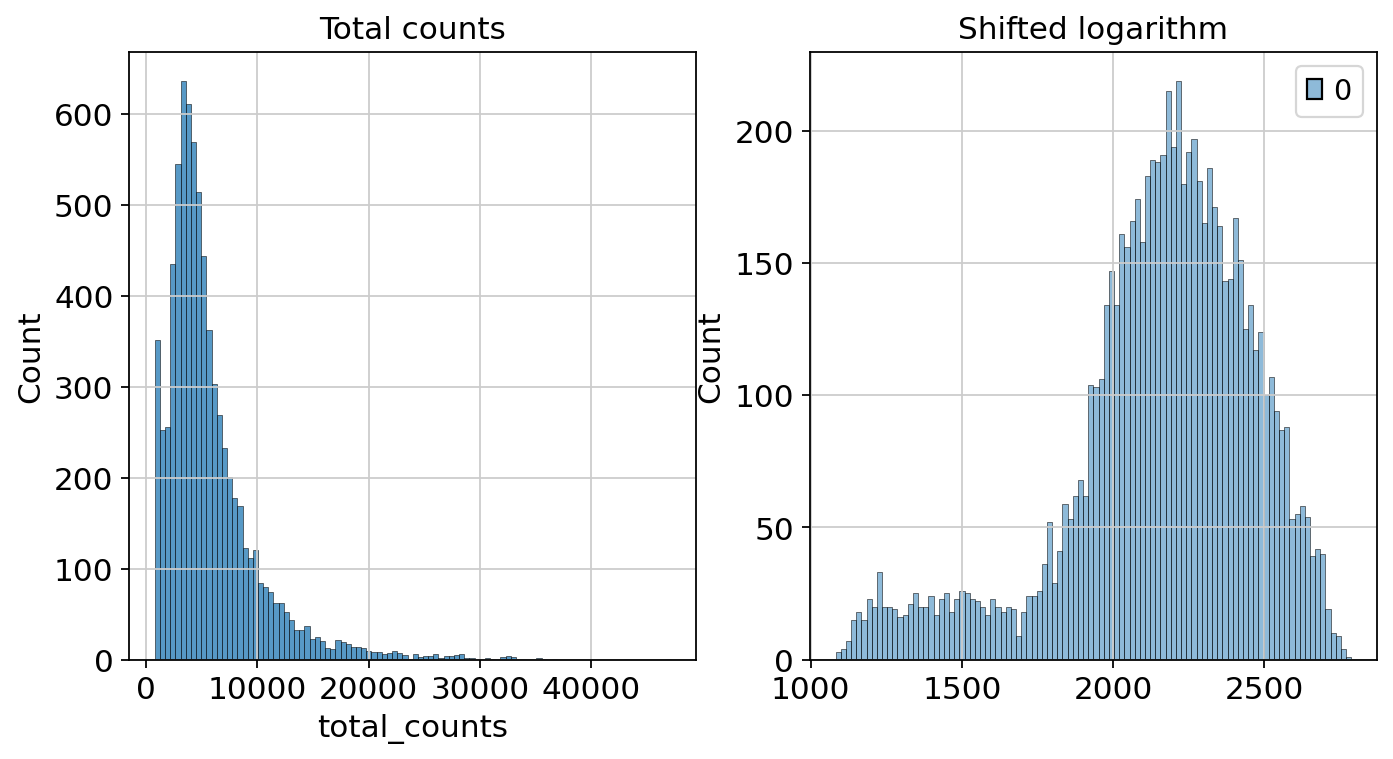

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

**Método de estimación del factor de tamaño** se basa en un agrupamiento de Scran, la diferencia es que estima factores de tamaño en función de una regresión lineal sobre genes para grupos de células. Su principal objetivo es considerar mejor las diferencias en las profundidades de recuento entre todas las células presentes en el conjunto de datos.

En este caso las células se dividen en grupos y la herramienta de Scran nos ayuda a calcular los factores de tamaño basados en grupos a partir de una regresión lineal sobre los genes. 

In [48]:
from scipy.sparse import csr_matrix, issparse

In [49]:
%%R
library(scran)
library(BiocParallel)

Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOr

In [50]:
# Preliminary clustering for differentiated normalisation
adata_pp = adata.copy()
sc.pp.normalize_total(adata_pp)
sc.pp.log1p(adata_pp)
sc.pp.pca(adata_pp, n_comps=15)
sc.pp.neighbors(adata_pp)
sc.tl.leiden(adata_pp, key_added="groups")

In [51]:
data_mat = adata_pp.X.T
# convert to CSC if possible. See https://github.com/MarioniLab/scran/issues/70
if issparse(data_mat):
    if data_mat.nnz > 2**31 - 1:
        data_mat = data_mat.tocoo()
    else:
        data_mat = data_mat.tocsc()
ro.globalenv["data_mat"] = data_mat
ro.globalenv["input_groups"] = adata_pp.obs["groups"]

In [52]:
del adata_pp

In [53]:
%%R -o size_factors

size_factors = sizeFactors(
    computeSumFactors(
        SingleCellExperiment(
            list(counts=data_mat)), 
            clusters = input_groups,
            min.mean = 0.1,
            BPPARAM = MulticoreParam()
    )
)

In [54]:
adata.obs["size_factors"] = size_factors
scran = adata.X / adata.obs["size_factors"].values[:, None]
adata.layers["scran_normalization"] = csr_matrix(sc.pp.log1p(scran))

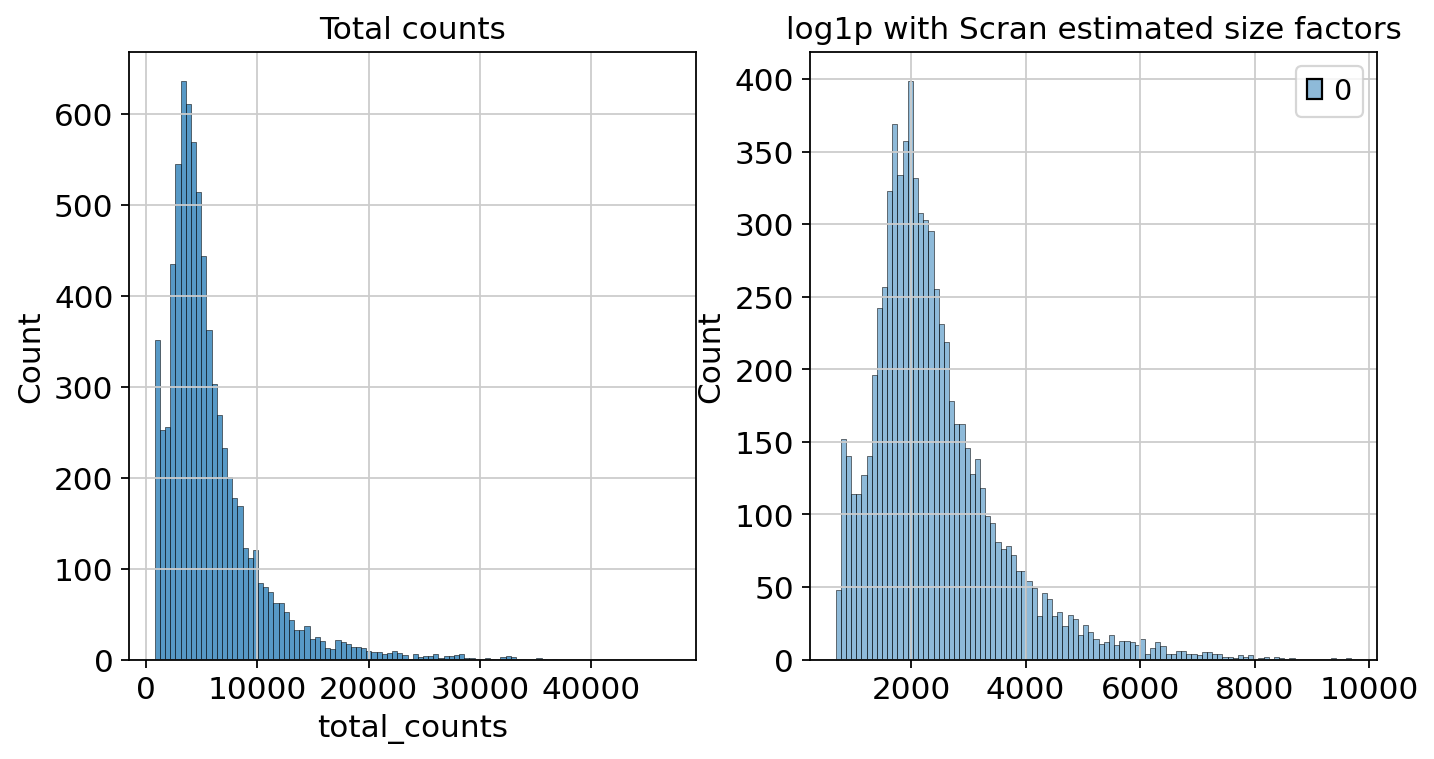

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(
    adata.layers["scran_normalization"].sum(1), bins=100, kde=False, ax=axes[1]
)
axes[1].set_title("log1p with Scran estimated size factors")
plt.show()

-----------
2. Método 2: Residuos analíticos de Pearson:

Éste método utiliza residuos de Pearson de la "regresión binomial negativa regularizada" que se encarga de calcular un modelo de ruido técnico de los datos. Lo que obtenemos de este método son los valores normalizados que pueden ser, para una célula y un gen:

- Positivos: indican que tenemos más recuentos
- Negativos: indican que tenemos menos recuentos de los esperado en comparación con la expresión promedio del gen y de la profundidad de la secuenciación celular.

En scanpy lo calculamos a partir de la matriz de recuento sin procesar.

In [56]:
analytic_pearson = sc.experimental.pp.normalize_pearson_residuals(adata, inplace=False)
adata.layers["analytic_pearson_residuals"] = csr_matrix(analytic_pearson["X"])

In [57]:
print(adata.layers.get("analytic_pearson_residuals", None))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 157533560 stored elements and shape (7565, 20824)>
  Coords	Values
  (0, 0)	-0.25784357101947464
  (0, 1)	-0.07445571881225714
  (0, 2)	3.5793081874888886
  (0, 3)	-0.14197111066342002
  (0, 4)	-0.12088739516062841
  (0, 5)	-0.5979652205969943
  (0, 6)	-0.10997478279639088
  (0, 7)	-0.13561890895386275
  (0, 8)	-0.12698538123108827
  (0, 9)	-0.39016260085319754
  (0, 10)	0.9338575048451685
  (0, 11)	-0.15141526626073834
  (0, 12)	-0.1463395495188661
  (0, 13)	-0.07445571881225714
  (0, 14)	-0.4105535769123021
  (0, 15)	-0.18779593220985877
  (0, 16)	-0.09655602419525858
  (0, 17)	-0.44263080026616536
  (0, 18)	-0.14805080838936227
  (0, 19)	-0.15470650775534103
  (0, 20)	-0.5775270337202559
  (0, 21)	-0.17602891748818833
  (0, 22)	-0.5006122312245843
  (0, 23)	-0.11556004261567757
  (0, 24)	-0.4006454916072709
  :	:
  (7564, 20799)	-0.9825949276537739
  (7564, 20800)	-0.5105993657345722
  (7564, 20801)	-0.8173050264513617
  

In [58]:
print(adata.layers["analytic_pearson_residuals"])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 157533560 stored elements and shape (7565, 20824)>
  Coords	Values
  (0, 0)	-0.25784357101947464
  (0, 1)	-0.07445571881225714
  (0, 2)	3.5793081874888886
  (0, 3)	-0.14197111066342002
  (0, 4)	-0.12088739516062841
  (0, 5)	-0.5979652205969943
  (0, 6)	-0.10997478279639088
  (0, 7)	-0.13561890895386275
  (0, 8)	-0.12698538123108827
  (0, 9)	-0.39016260085319754
  (0, 10)	0.9338575048451685
  (0, 11)	-0.15141526626073834
  (0, 12)	-0.1463395495188661
  (0, 13)	-0.07445571881225714
  (0, 14)	-0.4105535769123021
  (0, 15)	-0.18779593220985877
  (0, 16)	-0.09655602419525858
  (0, 17)	-0.44263080026616536
  (0, 18)	-0.14805080838936227
  (0, 19)	-0.15470650775534103
  (0, 20)	-0.5775270337202559
  (0, 21)	-0.17602891748818833
  (0, 22)	-0.5006122312245843
  (0, 23)	-0.11556004261567757
  (0, 24)	-0.4006454916072709
  :	:
  (7564, 20799)	-0.9825949276537739
  (7564, 20800)	-0.5105993657345722
  (7564, 20801)	-0.8173050264513617
  

In [59]:
print(adata.layers["analytic_pearson_residuals"].shape)

(7565, 20824)


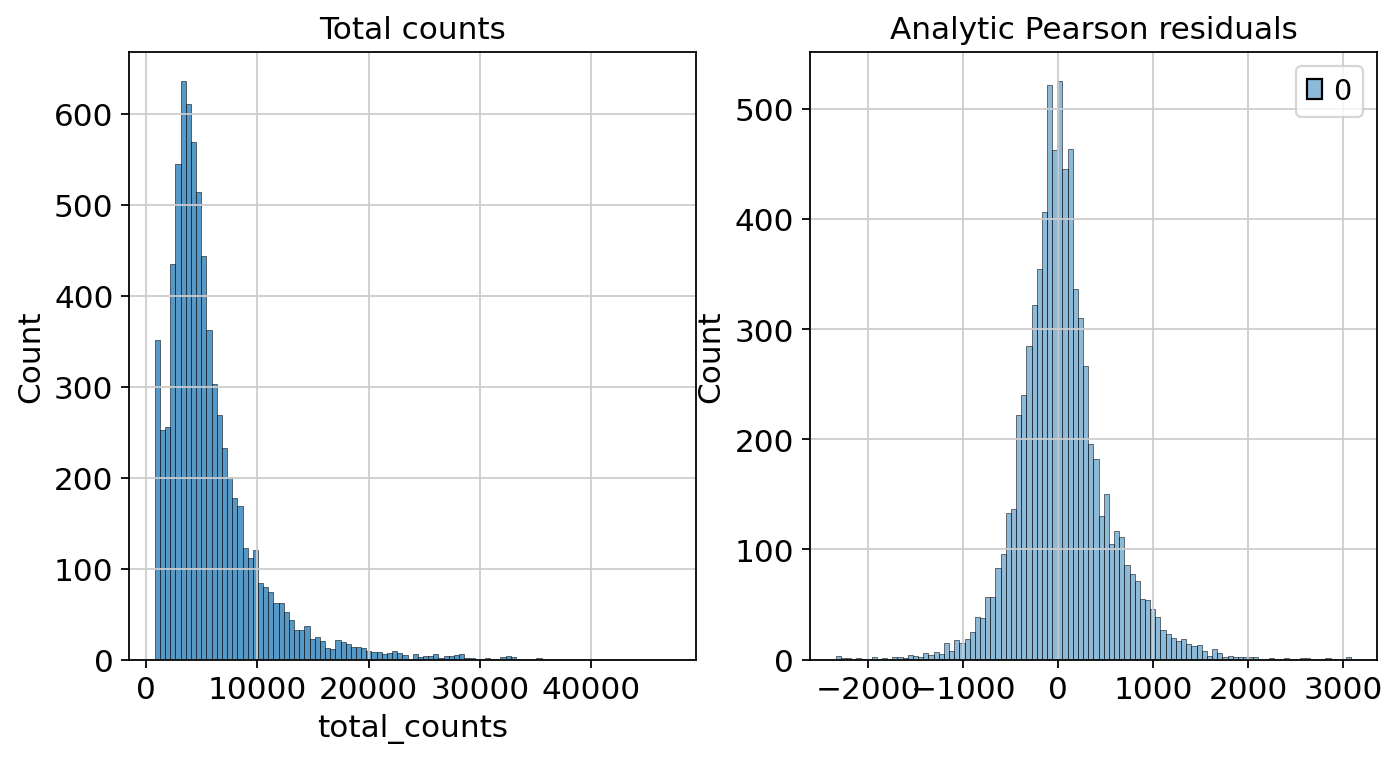

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(
    adata.layers["analytic_pearson_residuals"].sum(1), bins=100, kde=False, ax=axes[1]
)
axes[1].set_title("Analytic Pearson residuals")
plt.show()

In [61]:
adata.write("/home/mcgonzalez/Servicio_Social/Data/adata_scBestPractices/s4_normalization.h5ad")

------
## <span style="color:mediumvioletred">3. Selección de funciones</span>

En el análisis de scRNA-seq, después de la normalización de datos, es necesario realizar una selección de características para identificar los genes más informativos. Aunque los conjuntos de datos pueden contener hasta 30,000 genes, muchos de ellos no aportan información biológica relevante, ya que presentan principalmente recuentos cero.

Para ello, se propuso un método basado en la desviación binomial, que opera directamente con los datos sin procesar. Este enfoque es capaz de modelar los genes con expresión constante mediante un modelo nulo multinomial y clasifica los genes según su grado de desviación. Aquellos con alta desviación son considerados más informativos, ya que su expresión varía significativamente entre células.  

Para el cálculo de la desviación se emplementó en el paquete R ``scry``. Además,se ordenaron los genes según su desviación y se seleccionaron los 4000 más variables. Posteriormente, estos valores se almacenaron para facilitar una futura re-selección de genes. Finalmente, los resultados se visualizaron mediante gráficos de dispersión y media de expresión, observando que los genes altamente expresados tienden a ser altamente desviados.

In [62]:
import scanpy as sc
import anndata2ri
import logging
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


/tmp/ipykernel_1980532/2385762203.py:20: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [65]:
%%R
library(scry)

In addition: Warning messages:
1: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
2: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
3: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
4: In install.packages(update[instlib == l, "Package"], l, contriburl = contriburl,  :
  installation of package ‘igraph’ had non-zero exit status


In [66]:
adata = sc.read("/home/mcgonzalez/Servicio_Social/Data/adata_scBestPractices/s4_normalization.h5ad")

In [67]:
ro.globalenv["adata"] = adata

In [68]:
%%R
sce = devianceFeatureSelection(adata, assay="X")

In addition: Warning messages:
1: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
2: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [69]:
binomial_deviance = ro.r("rowData(sce)$binomial_deviance").T

In [70]:
idx = binomial_deviance.argsort()[-4000:]
mask = np.zeros(adata.var_names.shape, dtype=bool)
mask[idx] = True

adata.var["highly_deviant"] = mask
adata.var["binomial_deviance"] = binomial_deviance

In [71]:
sc.pp.highly_variable_genes(adata, layer="scran_normalization")

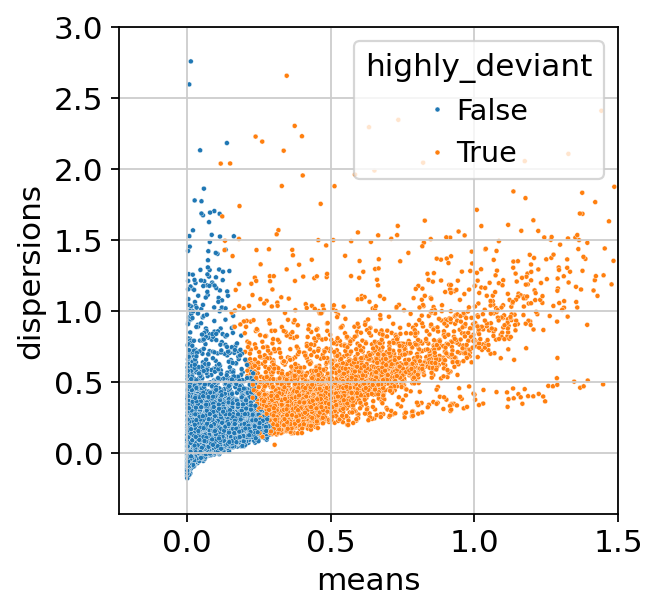

In [72]:
ax = sns.scatterplot(
    data=adata.var, x="means", y="dispersions", hue="highly_deviant", s=5
)
ax.set_xlim(None, 1.5)
ax.set_ylim(None, 3)
plt.show()

In [73]:
adata.write("/home/mcgonzalez/Servicio_Social/Data/adata_scBestPractices/s4_feature_selection.h5ad")

------
## <span style="color:mediumvioletred">4. Reducción de dimensionalidad</span>

El análisis de scRNA-seq produce datos de alta dimensión con miles de genes y células, lo que puede generar ruido y dificultar la interpretación. Para abordar esto, se emplearon técnicas de reducción de dimensionalidad, que transforman los datos en un espacio de menor dimensión preservando su estructura biológica relevante.  

Primero, se realizó un **Análisis de Componentes Principales (PCA)**, el cual es un método lineal que transforma los datos en nuevas variables no correlacionadas llamadas **componentes principales (PCs)**. Se ordenaron de acuerdo con la varianza explicada, conservando solo los más informativos (generalmente 10-50 PCs).  En general, PCA es computacionalmente eficiente, pero menos efectivo para datos altamente no lineales.  

Después se implementó en el ódigo, **t-SNE (t-distributed Stochastic Neighbor Embedding)** donde un proyecta datos de alta dimensión en 2D o 3D mantiene relaciones de vecindad usando distribuciones probabilísticas para preservar la estructura local, lo cual es útil para la visualización, pero puede ser computacionalmente costoso.  

Finalmente, se ejecutó **UMAP (Uniform Manifold Approximation and Projection)** que de manera similar a t-SNE, es más eficiente y con mejor conservación de la estructura global además de que utiliza gráficos de alta dimensión para preservar relaciones entre células. 

In [74]:
import scanpy as sc

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

In [75]:
adata = sc.read("/home/mcgonzalez/Servicio_Social/Data/adata_scBestPractices/s4_feature_selection.h5ad")

In [76]:
adata.X = adata.layers["log1p_norm"]

**PCA**

In [77]:
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
adata.var["highly_variable"] = adata.var["highly_deviant"]
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)

/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


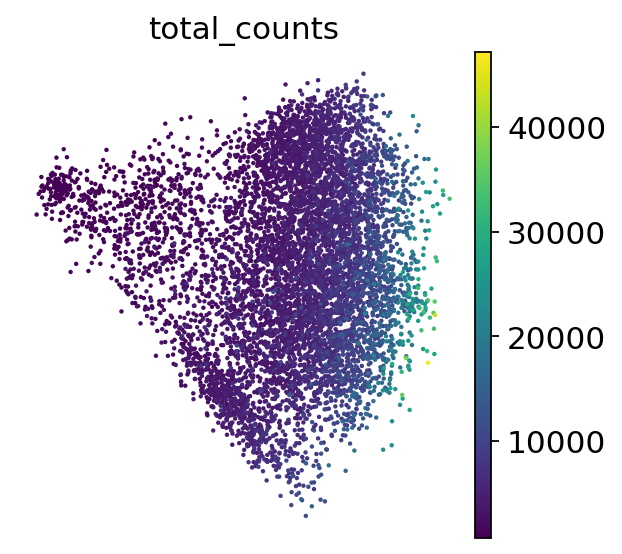

In [78]:
sc.pl.pca_scatter(adata, color="total_counts")

**t-SNE**

In [79]:
sc.tl.tsne(adata, use_rep="X_pca")

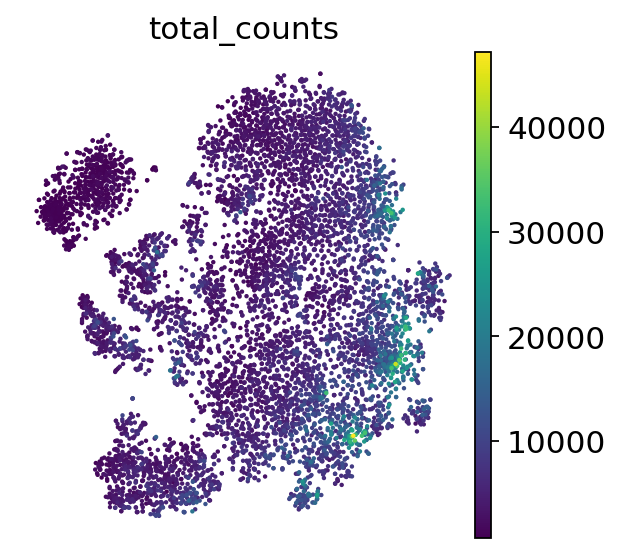

In [80]:
sc.pl.tsne(adata, color="total_counts")

**UMAP**

In [81]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

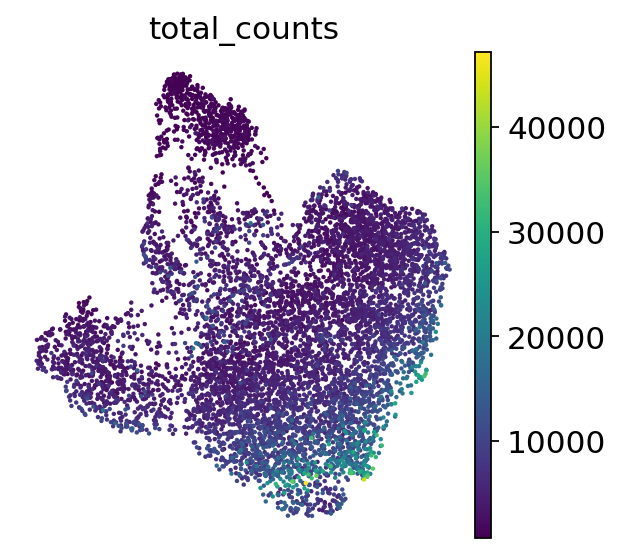

In [82]:
sc.pl.umap(adata, color="total_counts")

**Inspección de métricas de control de calidad**

In [84]:
adata

AnnData object with n_obs × n_vars = 7565 × 20824
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet', 'size_factors'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_deviant', 'binomial_deviance', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'pca', 'tsne', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'analytic_pearson_residuals', 'counts', 'log1p_norm', 'scran_normalization', 'soupX_counts'
    obsp: 'distances', 'connectivities'

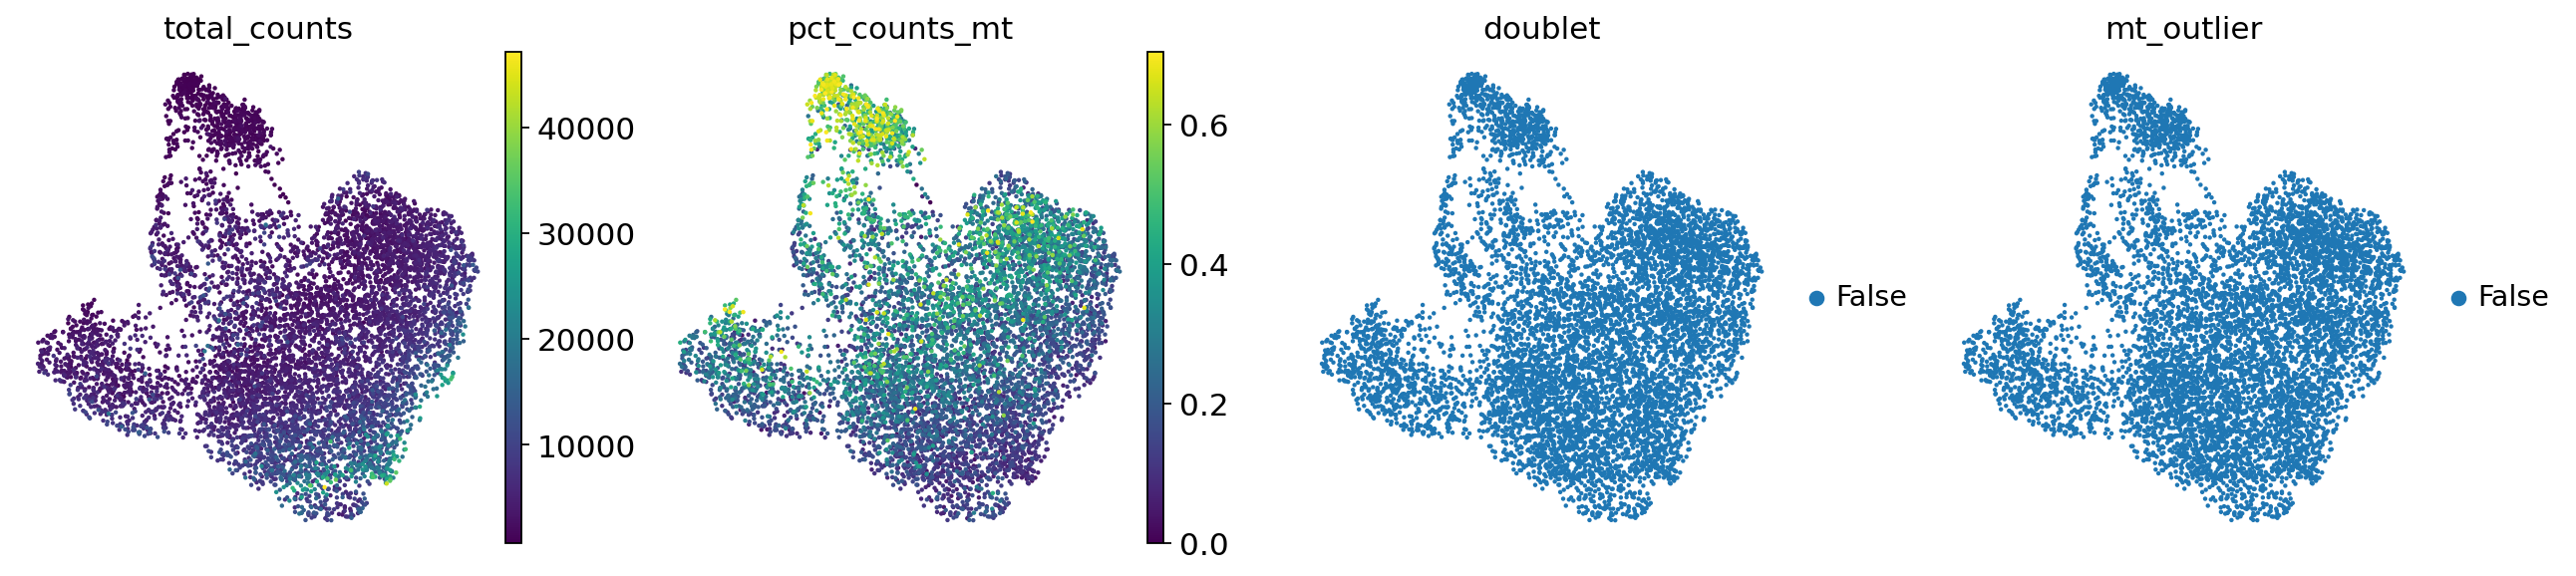

In [85]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt", "doublet", "mt_outlier"],
)

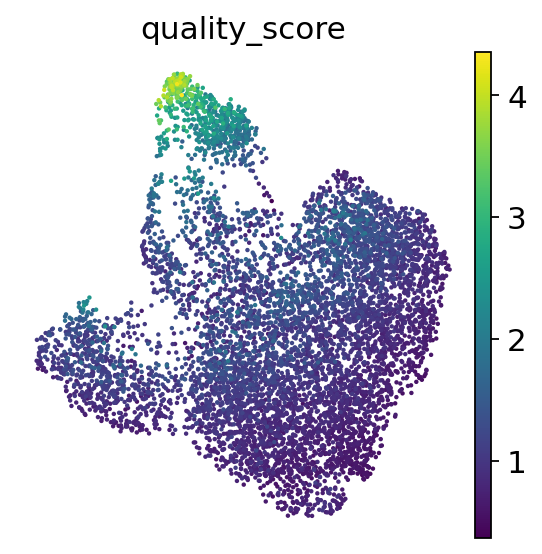

In [86]:
adata.obs["quality_score"] = (
    adata.obs["pct_counts_mt"] * 0.5 +
    adata.obs["pct_counts_ribo"] * 0.3 +
    adata.obs["size_factors"] * 0.2
)
sc.pl.umap(adata, color=["quality_score"])

In [87]:
adata.write("/home/mcgonzalez/Servicio_Social/Data/adata_scBestPractices/s4_dimensionality_reduction.h5ad")

--------
---------------
# <span style="color:darkmagenta">2. Identificación de la estructura celular</span>

## <span style="color:mediumvioletred">5. Agrupamiento</span>

Después del preprocesamiento y la reducción de dimensionalidad, el siguiente paso en el análisis de scRNA-seq es el agrupamiento de células. Esto permite identificar poblaciones celulares con perfiles de expresión similares y facilita su anotación.  

El agrupamiento en scRNA-seq se basa en la construcción de un gráfico de k vecinos más cercanos (KNN) a partir del espacio de expresión reducido (normalmente PCA). En este gráfico los nodos representan células, los enlaces reflejan similitud en la expresión génica y la densidad de conexiones en el grafo sugiere agrupaciones naturales. 

Para detectar comunidades dentro del grafo, se utilizaron algoritmos como ``Louvain`` y ``Leiden``, siendo este último el preferido por su mayor estabilidad y precisión durante el análisis bioinformático.  Para el proceso del algoritmo de Leiden primero se construyó un gráfico KNN en el espacio reducido de PCA.  Se implementó la Partición Inicial donde cada célula es su propia comunidad.  Así mismo, se optimizó Iterativa moviendo células entre comunidades para mejorar la cohesión del grupo. Finalemnte se implementó el Refinamiento y creación de una red agregada, iterando hasta alcanzar una partición estable.  

Por otra parte, para el Control del Nivel de Agrupamiento, el parámetro de resolución reguló la granularidad del clustering donde una Baja resolución (ej. 0.25) implica menos clústeres, agrupamientos más generales y una Alta resolución (ej. 1.0 o más) implica más clústeres, agrupamientos más finos. Es recomendable probar diferentes resoluciones y validar con la anotación celular.  

Finalmente se ejecutó la Visualización del Agrupamiento usando UMAP y t-SNE para proyectar los clústeres en 2D.  Además de la implementación de la Precaución que se refiere a las distancias entre clústeres en UMAP que no siempre reflejan similitudes biológicas reales.  En este caso, el método Leiden en ``Scanpy`` facilitó una clasificación eficiente de células en poblaciones biológicamente relevantes, permitiendo un análisis detallado del transcriptoma de células individuales.

In [88]:
import scanpy as sc

sc.settings.verbosity = 0
sc.settings.set_figure_params(dpi=80, facecolor="white", frameon=False)

In [89]:
adata = sc.read("/home/mcgonzalez/Servicio_Social/Data/adata_scBestPractices/s4_dimensionality_reduction.h5ad")

In [90]:
sc.pp.neighbors(adata, n_pcs=30)
sc.tl.umap(adata)

In [91]:
sc.tl.leiden(adata)

In [92]:
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

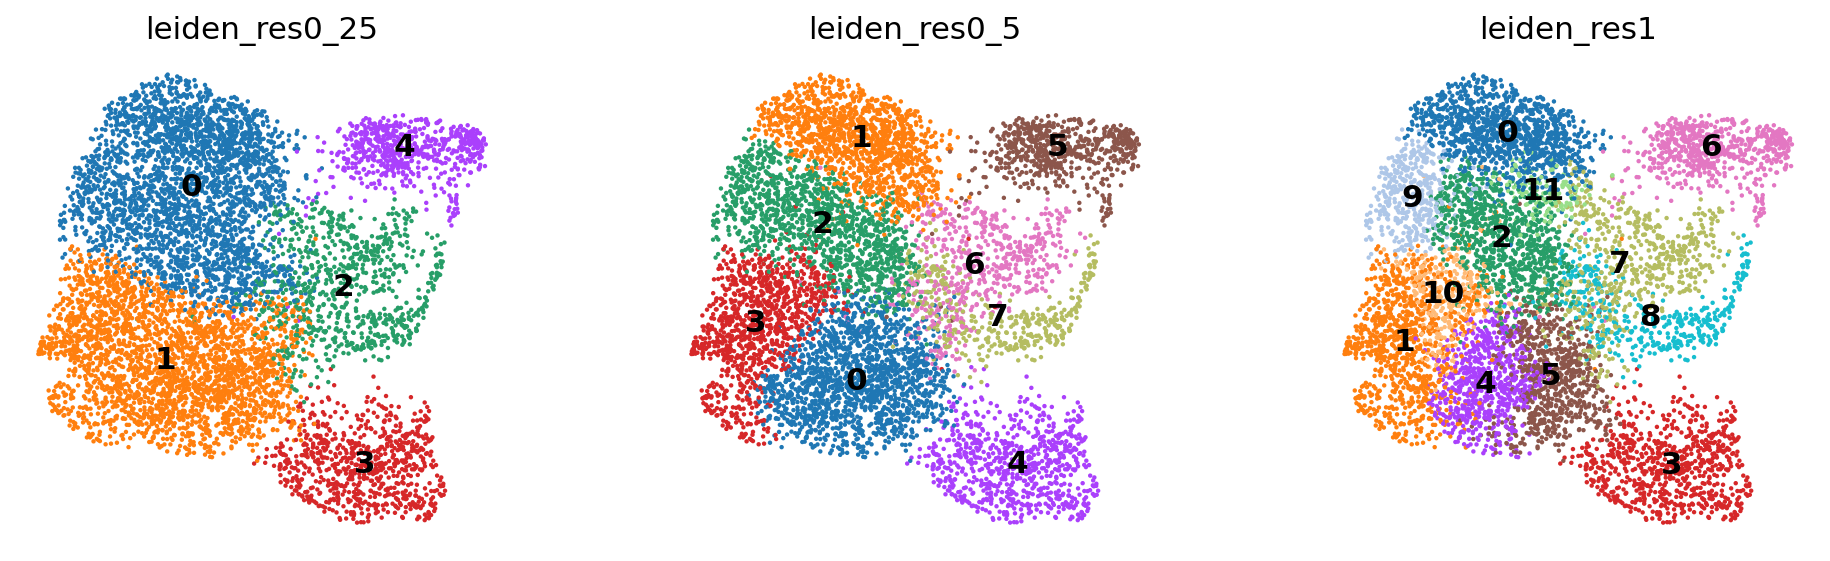

In [93]:
sc.pl.umap(
    adata,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
    legend_loc="on data",
)

In [101]:
adata.write("/home/mcgonzalez/Servicio_Social/Data/adata_scBestPractices/s4_clustered.h5ad")

--------
## <span style="color:mediumvioletred">6. Anotación</span>

In [102]:
#For downloads
import gdown, os, gzip, shutil

# Basic data management and plotting
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import os
from scipy.stats import median_abs_deviation

# Scanpy fundamentals
import anndata as ad
import scanpy as sc
import seaborn as sb

# sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(figsize=(6, 6))
import scvi
from scvi.model import SCVI
from scvi.external import SOLO

In [104]:
def pp(h5ad_path):
    adata = sc.read_h5ad(h5ad_path) 
    sc.pp.filter_genes(adata, min_cells=10)
    sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft=False)
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    df = df.dropna()
    adata = sc.read_h5ad(h5ad_path)
    adata.obs['Sample'] = h5ad_path.split('_')[2]  
    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]
    sc.pp.filter_cells(adata, min_genes=200)
    adata.var['mt'] = adata.var_names.str.startswith('mt-')
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=[20], log1p=True, inplace=True)
    
    # Función para detectar outliers
    def is_outlier(adata, metric: str, nmads: int):
        M = adata.obs[metric]
        outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
            np.median(M) + nmads * median_abs_deviation(M) < M
        )
        return outlier

    # Detectar outliers en las métricas de calidad
    adata.obs["outlier"] = (
        is_outlier(adata, "log1p_total_counts", 5)
        | is_outlier(adata, "log1p_n_genes_by_counts", 5)
        | is_outlier(adata, "pct_counts_in_top_20_genes", 5)
    )
    adata.obs["mt_outlier"] = is_outlier(adata, "pct_counts_mt", 3) | (
        adata.obs["pct_counts_mt"] > 25
    )
    
    # Filtrar outliers
    adata = adata[(~adata.obs.outlier) & (~adata.obs.mt_outlier)].copy()
    
    df = df.dropna()  
    return adata

In [105]:
os.listdir('/home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad')

['tumor_s5',
 'cache',
 'tumor_s3',
 'control6',
 'tumor_s4',
 'control1',
 'tumor_s1',
 'tumor_s2',
 'control2',
 'control4',
 'control3',
 'control5',
 'control7']

In [106]:
import shutil
import os

# Ruta al directorio 'cache'
cache_path = '/home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad/cache'

# Verifica si el directorio existe y elimínalo
if os.path.exists(cache_path) and os.path.isdir(cache_path):
    shutil.rmtree(cache_path)
    print(f"El directorio {cache_path} ha sido eliminado.")
else:
    print(f"El directorio {cache_path} no existe o no es un directorio.")

El directorio /home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad/cache ha sido eliminado.


In [107]:
out = []
for file in os.listdir('/home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad/'):
    file_path = os.path.join('/home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad/', file)
    if os.path.isfile(file_path):  # Verifica si es un archivo
        out.append(pp(file_path))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [23:55<00:00,  3.49s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [23:55<00:00,  3.59s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 183/400:  46%|▍| 183/400 [03:52<04:36,  1.27s/it, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.265. Signaling Trainer to stop.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [38:47<00:00,  5.71s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [38:47<00:00,  5.82s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 210/400:  52%|▌| 210/400 [06:37<05:59,  1.89s/it, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.284. Signaling Trainer to stop.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [18:27<00:00,  2.94s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [18:27<00:00,  2.77s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 237/400:  59%|▌| 237/400 [04:22<03:00,  1.11s/it, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.344. Signaling Trainer to stop.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [19:45<00:00,  2.97s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [19:45<00:00,  2.96s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 229/400:  57%|▌| 229/400 [03:55<02:55,  1.03s/it, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.346. Signaling Trainer to stop.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [05:50<00:00,  1.07it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [05:50<00:00,  1.14it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 156/400:  39%|▍| 156/400 [01:21<02:06,  1.92it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.280. Signaling Trainer to stop.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [14:14<00:00,  2.18s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [14:14<00:00,  2.14s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 173/400:  43%|▍| 173/400 [02:16<02:59,  1.27it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.236. Signaling Trainer to stop.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [14:51<00:00,  2.25s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [14:51<00:00,  2.23s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 215/400:  54%|▌| 215/400 [02:56<02:32,  1.21it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.223. Signaling Trainer to stop.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [08:38<00:00,  1.31s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [08:38<00:00,  1.30s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 218/400:  55%|▌| 218/400 [02:53<02:24,  1.26it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.334. Signaling Trainer to stop.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [03:39<00:00,  1.76it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [03:39<00:00,  1.82it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [02:11<00:00,  3.16it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [02:11<00:00,  3.03it/s, v_num=1, train_loss_step


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [03:16<00:00,  1.99it/s, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [03:16<00:00,  2.04it/s, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 346/400:  86%|▊| 346/400 [01:43<00:16,  3.33it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.345. Signaling Trainer to stop.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [09:11<00:00,  1.46s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [09:11<00:00,  1.38s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 217/400:  54%|▌| 217/400 [03:02<02:33,  1.19it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.220. Signaling Trainer to stop.


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [15:47<00:00,  2.31s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [15:47<00:00,  2.37s/it, v_num=1, train_loss_step
INFO     Creating doublets, preparing SOLO model.                                                                  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 248/400:  62%|▌| 248/400 [03:37<02:13,  1.14it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.256. Signaling Trainer to stop.


In [108]:
# Remove duplicate labels
for ad in out:
    ad.obs_names_make_unique()
    ad.var_names_make_unique()

# Concatenate Anndata object
adata = sc.concat(out)

# Make sure index and labels are unique
adata.obs_names_make_unique()
adata.var_names_make_unique()

In [109]:
adata

AnnData object with n_obs × n_vars = 103323 × 11691
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier'

In [110]:
sc.pp.filter_genes(adata, min_cells = 10)

In [111]:
from scipy.sparse import csr_matrix

In [112]:
adata.X = csr_matrix(adata.X)
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 183390688 stored elements and shape (103323, 11691)>

In [113]:
adata

AnnData object with n_obs × n_vars = 103323 × 11691
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier'
    var: 'n_cells'

In [114]:
adata.obs['Sample']

AAACCCAAGACCGCCT-1       h5ad/tumor
AAACCCAAGAGGCGGA-1       h5ad/tumor
AAACCCAAGCAGCCTC-1       h5ad/tumor
AAACCCAAGCCGTTAT-1       h5ad/tumor
AAACCCAAGGACGGAG-1       h5ad/tumor
                          ...      
TTTGTTGGTCCTTTGC-1    h5ad/control7
TTTGTTGGTCTCGGGT-1    h5ad/control7
TTTGTTGGTGCCTGCA-1    h5ad/control7
TTTGTTGTCAGAACCT-1    h5ad/control7
TTTGTTGTCCGATCTC-1    h5ad/control7
Name: Sample, Length: 103323, dtype: object

In [115]:
sc.pp.filter_genes(adata, min_cells = 100)

In [116]:
adata.layers['counts'] = adata.X.copy()

In [117]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [118]:
adata.write_h5ad('/home/mcgonzalez/Servicio_Social/Data/adata_saved/probe_Unintegrated_2024b.h5ad')

... storing 'Sample' as categorical


---------

**Modelado con scVI**

In [119]:
adata = sc.read_h5ad('/home/mcgonzalez/Servicio_Social/Data/adata_saved/probe_Unintegrated_2024b.h5ad')
adata

AnnData object with n_obs × n_vars = 103323 × 11691
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier'
    var: 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [120]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts'])

In [121]:
model=scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood='nb')

In [122]:
model.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Epoch 77/77: 100%|█| 77/77 [46:34<00:00, 36.16s/it, v_num=1, train_loss_step=4.6

`Trainer.fit` stopped: `max_epochs=77` reached.


Epoch 77/77: 100%|█| 77/77 [46:34<00:00, 36.29s/it, v_num=1, train_loss_step=4.6


In [123]:
adata

AnnData object with n_obs × n_vars = 103323 × 11691
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels'
    var: 'n_cells'
    uns: 'log1p', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'

In [124]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [125]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata)

In [126]:
import pymde
print("pymde importado exitosamente.")

pymde importado exitosamente.


In [127]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata.obsm[SCVI_LATENT_KEY])

INFO     Using cpu for `pymde.preserve_neighbors`.                                                                 


In [128]:
adata.layers['scvi_normalized']=model.get_normalized_expression(library_size = 1e4)

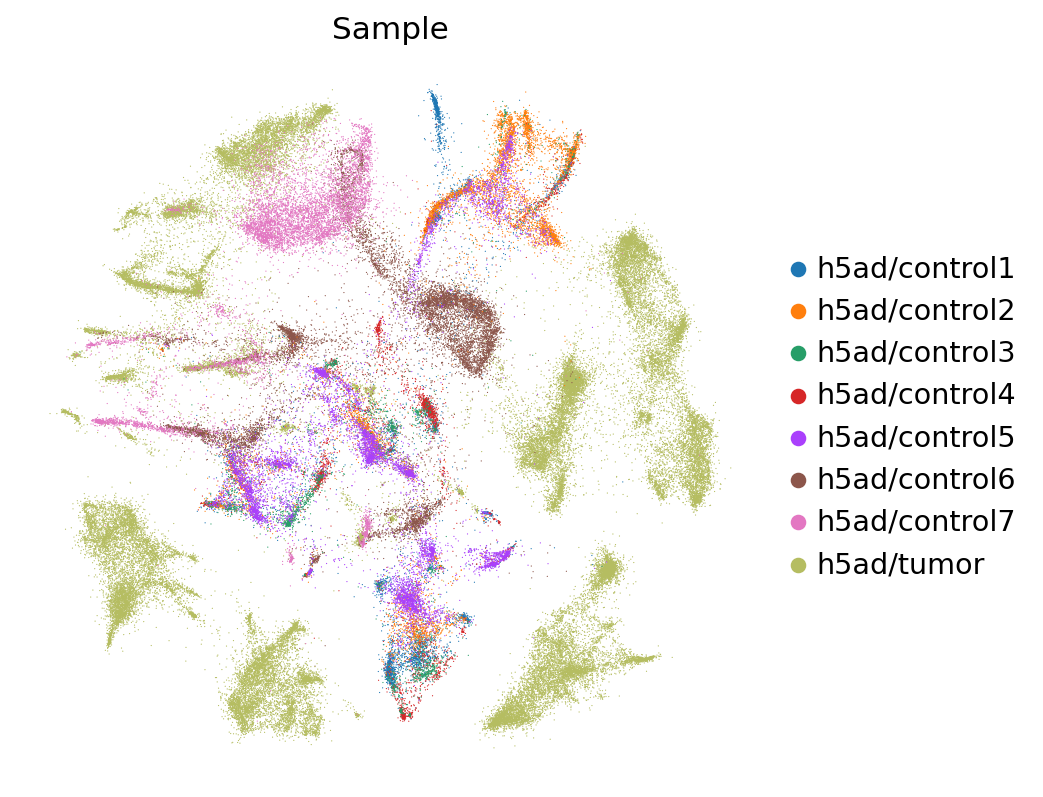

In [191]:
# Visualización del mapa
sc.pl.embedding(
    adata,
    basis=SCVI_MDE_KEY,
    color=["Sample"],
    frameon=False,
    ncols=1,
)

In [192]:
adata.obs

n_genes         Sample  doublet  n_genes_by_counts  \
AAACCCAAGACCGCCT-1     1419     h5ad/tumor    False               1419   
AAACCCAAGAGGCGGA-1      808     h5ad/tumor    False                808   
AAACCCAAGCAGCCTC-1     1700     h5ad/tumor    False               1700   
AAACCCAAGCCGTTAT-1     3397     h5ad/tumor    False               3397   
AAACCCAAGGACGGAG-1     3444     h5ad/tumor    False               3444   
...                     ...            ...      ...                ...   
TTTGTTGGTCCTTTGC-1     5512  h5ad/control7    False               5512   
TTTGTTGGTCTCGGGT-1     2940  h5ad/control7    False               2940   
TTTGTTGGTGCCTGCA-1     3599  h5ad/control7    False               3599   
TTTGTTGTCAGAACCT-1     3305  h5ad/control7    False               3305   
TTTGTTGTCCGATCTC-1     2777  h5ad/control7    False               2777   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACCCAAGACCGCCT-1                 7.258412        2097.0            7.648740   
AAACCCAAGAGGCGGA-1                 6.695799        1059.0            6.966024   
AAACCCAAGCAGCCTC-1                 7.438972        2728.0            7.911691   
AAACCCAAGCCGTTAT-1                 8.130942        8238.0            9.016634   
AAACCCAAGGACGGAG-1                 8.144679        8871.0            9.090655   
...                                     ...           ...                 ...   
TTTGTTGGTCCTTTGC-1                 8.614864       22386.0           10.016235   
TTTGTTGGTCTCGGGT-1                 7.986505        7561.0            8.930891   
TTTGTTGGTGCCTGCA-1                 8.188689       10608.0            9.269458   
TTTGTTGTCAGAACCT-1                 8.103494        9792.0            9.189424   
TTTGTTGTCCGATCTC-1                 7.929487        6759.0            8.818778   

                    pct_counts_in_top_20_genes  total_counts_mt  \
AAACCCAAGACCGCCT-1                   14.878398              0.0   
AAACCCAAGAGGCGGA-1                   14.069877              0.0   
AAACCCAAGCAGCCTC-1                   14.442815              0.0   
AAACCCAAGCCGTTAT-1                   17.601360              0.0   
AAACCCAAGGACGGAG-1                   20.640289              0.0   
...                                        ...              ...   
TTTGTTGGTCCTTTGC-1                    9.849906              0.0   
TTTGTTGGTCTCGGGT-1                   13.371247              0.0   
TTTGTTGGTGCCTGCA-1                   13.951735              0.0   
TTTGTTGTCAGAACCT-1                   12.837010              0.0   
TTTGTTGTCCGATCTC-1                   14.218080              0.0   

                    log1p_total_counts_mt  pct_counts_mt  outlier  mt_outlier  \
AAACCCAAGACCGCCT-1                    0.0            0.0    False       False   
AAACCCAAGAGGCGGA-1                    0.0            0.0    False       False   
AAACCCAAGCAGCCTC-1                    0.0            0.0    False       False   
AAACCCAAGCCGTTAT-1                    0.0            0.0    False       False   
AAACCCAAGGACGGAG-1                    0.0            0.0    False       False   
...                                   ...            ...      ...         ...   
TTTGTTGGTCCTTTGC-1                    0.0            0.0    False       False   
TTTGTTGGTCTCGGGT-1                    0.0            0.0    False       False   
TTTGTTGGTGCCTGCA-1                    0.0            0.0    False       False   
TTTGTTGTCAGAACCT-1                    0.0            0.0    False       False   
TTTGTTGTCCGATCTC-1                    0.0            0.0    False       False   

                    _scvi_batch  _scvi_labels leiden  
AAACCCAAGACCGCCT-1            0             0     14  
AAACCCAAGAGGCGGA-1            0             0     14  
AAACCCAAGCAGCCTC-1            0             0     14  
AAACCCAAGCCGTTAT-1            0             0     30  
AAACCCAAGGACGGAG-1            0             0     14  
...                         ...           ...    .

In [193]:
# Lista de valores únicos en la columna 'Sample'
print(adata.obs["Sample"].unique())

['h5ad/tumor', 'h5ad/control6', 'h5ad/control1', 'h5ad/control2', 'h5ad/control4', 'h5ad/control3', 'h5ad/control5', 'h5ad/control7']
Categories (8, object): ['h5ad/control1', 'h5ad/control2', 'h5ad/control3', 'h5ad/control4', 'h5ad/control5', 'h5ad/control6', 'h5ad/control7', 'h5ad/tumor']


In [194]:
adata.obs["Sample"].value_counts()

Sample
h5ad/tumor       57636
h5ad/control6    11197
h5ad/control7     8483
h5ad/control5     8113
h5ad/control2     7430
h5ad/control1     5059
h5ad/control4     3109
h5ad/control3     2296
Name: count, dtype: int64

In [195]:
import os

path = "/home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad/"
files = os.listdir(path)

print(files)

['tumor_s5', 'tumor_s3', 'control6', 'tumor_s4', 'control1', 'tumor_s1', 'tumor_s2', 'control2', 'control4', 'control3', 'control5', 'control7']


In [196]:
tumor_files = [f for f in files if f.startswith("tumor_") and f.endswith(".h5ad")]

In [197]:
path = "/home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad/"
files = os.listdir(path)

# Filtrar archivos de tumor con extensión correcta
tumor_files = [f for f in files if f.startswith("tumor_") and f.endswith(".h5ad")]

print("Archivos de tumor detectados:", tumor_files)

if not tumor_files:
    print("No se encontraron archivos de tumor con la extensión '.h5ad'")

Archivos de tumor detectados: []
No se encontraron archivos de tumor con la extensión '.h5ad'


In [198]:
tumor_adata_list = []
for tumor_file in tumor_files:
    file_path = os.path.join(path, tumor_file)
    print(f"Intentando cargar {file_path}")
    try:
        adata_sample = sc.read(file_path)
        print(f"{tumor_file} cargado correctamente.")
        adata_sample.obs["Sample"] = tumor_file.replace(".h5ad", "")  # Añadir etiqueta
        tumor_adata_list.append(adata_sample)
    except Exception as e:
        print(f"Error al cargar {tumor_file}: {e}")

if not tumor_adata_list:
    print("No se pudo cargar ningún archivo de tumor.")

No se pudo cargar ningún archivo de tumor.


In [199]:
import os

path = "/home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad/"
files = os.listdir(path)
print("Archivos en el directorio:", files)

Archivos en el directorio: ['tumor_s5', 'tumor_s3', 'control6', 'tumor_s4', 'control1', 'tumor_s1', 'tumor_s2', 'control2', 'control4', 'control3', 'control5', 'control7']


In [200]:
tumor_files = [f for f in files if f.startswith("tumor_")]
print("Archivos que empiezan con 'tumor_':", tumor_files)

tumor_files_h5ad = [f for f in tumor_files if f.endswith(".h5ad")]
print("Archivos de tumor con extensión '.h5ad':", tumor_files_h5ad)

Archivos que empiezan con 'tumor_': ['tumor_s5', 'tumor_s3', 'tumor_s4', 'tumor_s1', 'tumor_s2']
Archivos de tumor con extensión '.h5ad': []


In [201]:
for tumor_file in tumor_files_h5ad:
    file_path = os.path.join(path, tumor_file)
    print(f"¿Se puede leer {tumor_file}? {os.access(file_path, os.R_OK)}")

In [202]:
import scanpy as sc

file_to_test = "/home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad/tumor_s1.h5ad"  # Cambia por un archivo existente
try:
    adata_test = sc.read(file_to_test)
    print(f"{file_to_test} cargado correctamente.")
except Exception as e:
    print(f"Error al cargar {file_to_test}: {e}")

Error al cargar /home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad/tumor_s1.h5ad: [Errno 2] Unable to synchronously open file (unable to open file: name = '/home/mcgonzalez/Servicio_Social/Data/Inicial_h5ad/tumor_s1.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)


In [203]:
adata.write_h5ad('/home/mcgonzalez/Servicio_Social/Data/adata_saved/probe_integrated_2024b.h5ad')

-----------
## <span style="color:mediumvioletred">7. Anotación automatizada (CellTypist)</span>

La anotación celular es el proceso de identificar y etiquetar tipos celulares en datos de scRNA-seq según fenotipos celulares conocidos, como células inmunes. Los tipos celulares son categorizaciones basadas en la expresión de marcadores específicos, aunque pueden existir subtipos o estados celulares que también deben ser considerados. Para ello, existen métodos de anotación automatizada que utilizan clasificadores entrenados con datos transcriptómicos, aunque la calidad de las anotaciones depende del clasificador, los datos de entrenamiento y su similitud con los datos del análisis. En este análisis se implementó CellTypist que utiliza conjuntos amplios de genes para realizar anotaciones más precisas, aprovechando grandes volúmenes de datos de scRNA-seq.

In [1]:
import celltypist
from celltypist import models

In [2]:
#For downloads
import gdown, os, gzip, shutil

# Basic data management and plotting
import pandas as pd
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import os
from scipy.stats import median_abs_deviation

# Scanpy fundamentals
import anndata as ad
import scanpy as sc
import seaborn as sb

# sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(figsize=(6, 6))
import scvi
from scvi.model import SCVI
from scvi.external import SOLO

/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mcgonzalez/miniconda3/envs/Servicio/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [4]:
adata = sc.read_h5ad('/home/mcgonzalez/Servicio_Social/Data/adata_saved/probe_integrated_2024b.h5ad')
adata

AnnData object with n_obs × n_vars = 103323 × 11691
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'log1p', 'neighbors'
    obsm: 'X_scVI', 'X_scVI_MDE', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [5]:
adata_celltypist = adata.copy()  # make a copy of our adata
adata_celltypist.X = adata.layers["counts"]  # set adata.X to raw counts
sc.pp.normalize_per_cell(
    adata_celltypist, counts_per_cell_after=10**4
)  # normalize to 10,000 counts per cell
sc.pp.log1p(adata_celltypist)  # log-transform
# make .X dense instead of sparse, for compatibility with celltypist:
adata_celltypist.X = adata_celltypist.X.toarray()

In [6]:
models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`


model  \
0                        Immune_All_Low.pkl   
1                       Immune_All_High.pkl   
2                    Adult_COVID19_PBMC.pkl   
3   Adult_CynomolgusMacaque_Hippocampus.pkl   
4                       Adult_Human_MTG.pkl   
5           Adult_Human_PancreaticIslet.pkl   
6          Adult_Human_PrefrontalCortex.pkl   
7                      Adult_Human_Skin.pkl   
8                       Adult_Mouse_Gut.pkl   
9             Adult_Mouse_OlfactoryBulb.pkl   
10                Adult_Pig_Hippocampus.pkl   
11      Adult_RhesusMacaque_Hippocampus.pkl   
12                 Autopsy_COVID19_Lung.pkl   
13         COVID19_HumanChallenge_Blood.pkl   
14             COVID19_Immune_Landscape.pkl   
15                   Cells_Adult_Breast.pkl   
16                     Cells_Fetal_Lung.pkl   
17                   Cells_Human_Tonsil.pkl   
18               Cells_Intestinal_Tract.pkl   
19                    Cells_Lung_Airway.pkl   
20               Developing_Human_Brain.pkl   
21              Developing_Human_Gonads.pkl   
22         Developing_Human_Hippocampus.pkl   
23              Developing_Human_Organs.pkl   
24              Developing_Human_Thymus.pkl   
25               Developing_Mouse_Brain.pkl   
26         Developing_Mouse_Hippocampus.pkl   
27            Fetal_Human_AdrenalGlands.pkl   
28                 Fetal_Human_Pancreas.pkl   
29                Fetal_Human_Pituitary.pkl   
30                   Fetal_Human_Retina.pkl   
31                     Fetal_Human_Skin.pkl   
32                  Healthy_Adult_Heart.pkl   
33                 Healthy_COVID19_PBMC.pkl   
34                  Healthy_Human_Liver.pkl   
35                  Healthy_Mouse_Liver.pkl   
36          Human_AdultAged_Hippocampus.pkl   
37              Human_Colorectal_Cancer.pkl   
38           Human_Developmental_Retina.pkl   
39              Human_Embryonic_YolkSac.pkl   
40                       Human_IPF_Lung.pkl   
41       Human_Longitudinal_Hippocampus.pkl   
42                     Human_Lung_Atlas.pkl   
43                        Human_PF_Lung.pkl   
44               Human_Placenta_Decidua.pkl   
45                  Lethal_COVID19_Lung.pkl   
46                  Mouse_Dentate_Gyrus.pkl   
47          Mouse_Isocortex_Hippocampus.pkl   
48         Mouse_Postnatal_DentateGyrus.pkl   
49                    Mouse_Whole_Brain.pkl   
50                   Nuclei_Lung_Airway.pkl   
51                      Pan_Fetal_Human.pkl   

                                          description  
0   immune sub-populations combined from 20 tissue...  
1   immune populations combined from 20 tissues of...  
2   peripheral blood mononuclear cell types from C...  
3   cell types from the hippocampus of adult cynom...  
4   cell types and subtypes (10x-based) from the a...  
5   cell types from pancreatic islets of healthy a...  
6   cell types and subtypes from the adult human d...  
7            cell types from human healthy adult skin  
8   cell types in the adult mouse gut combined fro...  
9    cell types from the olfactory bulb of adult mice  
10          cell types from the adult pig hippocampus  
11  cell types from the hippocampus of adult rhesu...  
12  cell types from the lungs of 16 SARS-CoV-2 inf...  
13  detailed blood cell states from 16 individuals...  
14  immune subtypes from lung and blood of COVID-1...  
15             cell types from the adult human breast  
16    cell types from human embryonic and fetal lungs  
17      tonsillar cell types from humans (3-65 years)  
18  intestinal cells from fetal, pediatric (health...  
19  cell populations from scRNA-seq of five locati...  
20  cell types from the first-trimester developing...  
21  cell types of human gonadal and adjacent extra...  
22   cell types from the developing human hippocampus  
23  cell types of five endoderm-derived organs in ...  
24  cell populations in embryonic, fetal, pediatri...  
25  cell types from the embryonic mouse brain betw...  
26  cell types from the mouse hipp

In [7]:
models.download_models(
    force_update=True, model=["Healthy_Human_Liver.pkl"]
)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 54
📂 Storing models in /home/mcgonzalez/.celltypist/data/models
💾 Total models to download: 1
💾 Downloading model [1/1]: Healthy_Human_Liver.pkl


In [8]:
model = models.Model.load('Healthy_Human_Liver.pkl')

In [9]:
model.cell_types

array(['B cells', 'Basophils', 'Cholangiocytes', 'Circulating NK/NKT',
       'Endothelial cells', 'Fibroblasts', 'Hepatocytes', 'Macrophages',
       'Mig.cDCs', 'Mono+mono derived cells', 'Neutrophils',
       'Plasma cells', 'Resident NK', 'T cells', 'cDC1s', 'cDC2s', 'pDCs'],
      dtype=object)

In [10]:
model

CellTypist model with 17 cell types and 2691 features
    date: 2023-09-14 12:48:54.179790
    details: cell types from scRNA-seq and snRNA-seq of the adult human liver
    source: https://doi.org/10.1016/j.cell.2021.12.018
    version: v1
    cell types: B cells, Basophils, ..., pDCs
    features: HES4, TNFRSF18, ..., MT-CYB

In [11]:
adata

AnnData object with n_obs × n_vars = 103323 × 11691
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'log1p', 'neighbors'
    obsm: 'X_scVI', 'X_scVI_MDE', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [12]:
predictions_high = celltypist.annotate(
    adata_celltypist, model=model, majority_voting=True
)

🔬 Input data has 103323 cells and 11691 genes
🔗 Matching reference genes in the model
🧬 1994 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 25
🗳️ Majority voting the predictions
✅ Majority voting done!


In [13]:
predictions_high_adata = predictions_high.to_adata()

In [14]:
adata.obs["celltypist_cell_label_coarse"] = predictions_high_adata.obs.loc[
    adata.obs.index, "majority_voting"
]
adata.obs["celltypist_conf_score_coarse"] = predictions_high_adata.obs.loc[
    adata.obs.index, "conf_score"
]

In [17]:
def predict_cells(adata):
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.normalize_total(adata, target_sum=1e4) #not recommended for typical pp
    sc.pp.log1p(adata)

    adata.X = adata.X.toarray()
    predictions = celltypist.annotate(adata, model = 'Healthy_Human_Liver.pkl', 
                                  majority_voting = True)
    adata = predictions.to_adata()
    adata.obs["predicted_label"] = adata.obs.loc[adata.obs.index, "predicted_labels"]
    adata.obs["over_clustering"] = adata.obs.loc[adata.obs.index, "over_clustering"]
    adata.obs["majority_voting"] = adata.obs.loc[adata.obs.index, "majority_voting"]

    return adata.obs

In [18]:
dataset = adata[:105717, :]
predictions = predict_cells(dataset.copy())
print(predictions)

🔬 Input data has 103323 cells and 11691 genes
🔗 Matching reference genes in the model
🧬 1994 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 25
🗳️ Majority voting the predictions
✅ Majority voting done!


                    n_genes         Sample  doublet  n_genes_by_counts  \
AAACCCAAGACCGCCT-1     1419     h5ad/tumor    False               1419   
AAACCCAAGAGGCGGA-1      808     h5ad/tumor    False                808   
AAACCCAAGCAGCCTC-1     1700     h5ad/tumor    False               1700   
AAACCCAAGCCGTTAT-1     3397     h5ad/tumor    False               3397   
AAACCCAAGGACGGAG-1     3444     h5ad/tumor    False               3444   
...                     ...            ...      ...                ...   
TTTGTTGGTCCTTTGC-1     5512  h5ad/control7    False               5512   
TTTGTTGGTCTCGGGT-1     2940  h5ad/control7    False               2940   
TTTGTTGGTGCCTGCA-1     3599  h5ad/control7    False               3599   
TTTGTTGTCAGAACCT-1     3305  h5ad/control7    False               3305   
TTTGTTGTCCGATCTC-1     2777  h5ad/control7    False               2777   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACCCAAGACCGCCT-1            

In [19]:
predictions = predictions[['predicted_label', 'over_clustering', 'majority_voting']]
predictions

predicted_label over_clustering majority_voting
AAACCCAAGACCGCCT-1        Hepatocytes               7     Hepatocytes
AAACCCAAGAGGCGGA-1        Hepatocytes               1     Hepatocytes
AAACCCAAGCAGCCTC-1        Hepatocytes              61     Hepatocytes
AAACCCAAGCCGTTAT-1  Endothelial cells             153     Hepatocytes
AAACCCAAGGACGGAG-1        Hepatocytes             269     Hepatocytes
...                               ...             ...             ...
TTTGTTGGTCCTTTGC-1        Hepatocytes              81     Hepatocytes
TTTGTTGGTCTCGGGT-1        Hepatocytes             166     Hepatocytes
TTTGTTGGTGCCTGCA-1        Hepatocytes              40     Hepatocytes
TTTGTTGTCAGAACCT-1        Hepatocytes              77     Hepatocytes
TTTGTTGTCCGATCTC-1        Hepatocytes             166     Hepatocytes

[103323 rows x 3 columns]

In [20]:
adata

AnnData object with n_obs × n_vars = 103323 × 11691
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels', 'leiden', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'log1p', 'neighbors'
    obsm: 'X_scVI', 'X_scVI_MDE', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [21]:
# Crear DataFrames sin duplicados
obs_clean = adata.obs[~adata.obs.index.duplicated(keep='first')]
predictions_clean = predictions[~predictions.index.duplicated(keep='first')]

# Verificar nuevamente las longitudes después de eliminar duplicados
print(f"Longitud de obs_clean después de eliminar duplicados: {len(obs_clean)}")
print(f"Longitud de predictions_clean después de eliminar duplicados: {len(predictions_clean)}")

# Asegúrate de que ambos índices estén alineados
common_index = obs_clean.index.intersection(predictions_clean.index)
obs_clean = obs_clean.loc[common_index]
predictions_clean = predictions_clean.loc[common_index]

print(f"Índices comunes después de eliminar duplicados: {len(common_index)}")

# Realiza el merge
merged_obs = obs_clean.merge(right=predictions_clean, left_index=True, right_index=True)

# Crear un DataFrame temporal con los índices alineados
temp_obs = pd.DataFrame(index=adata.obs.index)
temp_obs = temp_obs.join(merged_obs, how="left")

# Verificar el resultado
print(f"Longitud final de temp_obs: {len(temp_obs)}")

Longitud de obs_clean después de eliminar duplicados: 103323
Longitud de predictions_clean después de eliminar duplicados: 103323
Índices comunes después de eliminar duplicados: 103323
Longitud final de temp_obs: 103323


In [22]:
# Asignar el DataFrame temporal a adata.obs
adata.obs = temp_obs

# Verificar el resultado final
print(f"Longitud final de adata.obs: {len(adata.obs)}")

Longitud final de adata.obs: 103323


In [23]:
adata

AnnData object with n_obs × n_vars = 103323 × 11691
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels', 'leiden', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'predicted_label', 'over_clustering', 'majority_voting'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'log1p', 'neighbors'
    obsm: 'X_scVI', 'X_scVI_MDE', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [24]:
for col in adata.obs.columns:
    adata.obs[col] = adata.obs[col].astype(str)

In [25]:
print(adata)

AnnData object with n_obs × n_vars = 103323 × 11691
    obs: 'n_genes', 'Sample', 'doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels', 'leiden', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'predicted_label', 'over_clustering', 'majority_voting'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'log1p', 'neighbors'
    obsm: 'X_scVI', 'X_scVI_MDE', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'


In [26]:
adata.obs

n_genes         Sample doublet n_genes_by_counts  \
AAACCCAAGACCGCCT-1    1419     h5ad/tumor   False              1419   
AAACCCAAGAGGCGGA-1     808     h5ad/tumor   False               808   
AAACCCAAGCAGCCTC-1    1700     h5ad/tumor   False              1700   
AAACCCAAGCCGTTAT-1    3397     h5ad/tumor   False              3397   
AAACCCAAGGACGGAG-1    3444     h5ad/tumor   False              3444   
...                    ...            ...     ...               ...   
TTTGTTGGTCCTTTGC-1    5512  h5ad/control7   False              5512   
TTTGTTGGTCTCGGGT-1    2940  h5ad/control7   False              2940   
TTTGTTGGTGCCTGCA-1    3599  h5ad/control7   False              3599   
TTTGTTGTCAGAACCT-1    3305  h5ad/control7   False              3305   
TTTGTTGTCCGATCTC-1    2777  h5ad/control7   False              2777   

                   log1p_n_genes_by_counts total_counts log1p_total_counts  \
AAACCCAAGACCGCCT-1       7.258412150595306       2097.0            7.64874   
AAACCCAAGAGGCGGA-1       6.695798917058491       1059.0          6.9660244   
AAACCCAAGCAGCCTC-1       7.438971592395862       2728.0          7.9116907   
AAACCCAAGCCGTTAT-1       8.130942302231878       8238.0           9.016634   
AAACCCAAGGACGGAG-1       8.144679183447758       8871.0           9.090655   
...                                    ...          ...                ...   
TTTGTTGGTCCTTTGC-1       8.614864218589684      22386.0          10.016235   
TTTGTTGGTCTCGGGT-1       7.986504938553995       7561.0           8.930891   
TTTGTTGGTGCCTGCA-1         8.1886891244442      10608.0           9.269458   
TTTGTTGTCAGAACCT-1        8.10349427838097       9792.0           9.189424   
TTTGTTGTCCGATCTC-1       7.929486523314289       6759.0           8.818778   

                   pct_counts_in_top_20_genes total_counts_mt  \
AAACCCAAGACCGCCT-1         14.878397711015737             0.0   
AAACCCAAGAGGCGGA-1         14.069877242681775             0.0   
AAACCCAAGCAGCCTC-1         14.442815249266863             0.0   
AAACCCAAGCCGTTAT-1         17.601359553289633             0.0   
AAACCCAAGGACGGAG-1         20.640288580768797             0.0   
...                                       ...             ...   
TTTGTTGGTCCTTTGC-1          9.849906191369605             0.0   
TTTGTTGGTCTCGGGT-1         13.371247189525196             0.0   
TTTGTTGGTGCCTGCA-1         13.951734539969834             0.0   
TTTGTTGTCAGAACCT-1         12.837009803921568             0.0   
TTTGTTGTCCGATCTC-1         14.218079597573604             0.0   

                   log1p_total_counts_mt  ... outlier mt_outlier _scvi_batch  \
AAACCCAAGACCGCCT-1                   0.0  ...   False      False           0   
AAACCCAAGAGGCGGA-1                   0.0  ...   False      False           0   
AAACCCAAGCAGCCTC-1                   0.0  ...   False      False           0   
AAACCCAAGCCGTTAT-1                   0.0  ...   False      False           0   
AAACCCAAGGACGGAG-1                   0.0  ...   False      False           0   
...                                  ...  ...     ...        ...         ...   
TTTGTTGGTCCTTTGC-1                   0.0  ...   False      False           0   
TTTGTTGGTCTCGGGT-1                   0.0  ...   False      False           0   
TTTGTTGGTGCCTGCA-1                   0.0  ...   False      False           0   
TTTGTTGTCAGAACCT-1                   0.0  ...   False      False           0   
TTTGTTGTCCGATCTC-1                   0.0  ...   False      False           0   

                   _scvi_labels leiden celltypist_cell_label_coarse  \
AAACCCAAGACCGCCT-1            0     14                  Hepatocytes   
AAACCCAAGAGGCGGA-1            0     14                  Hepatocytes   
AAACCCAAGCAGCCTC-1            0     14                  Hepatocytes   
AAACCCAAGCCGTTAT-1            0     30                  Hepatocytes   
AAACCCAAGGACGGAG-1            0     14                  Hepatocytes   
...                         ...    ...                       